In [1]:
#IMPORTING THE LIBRARIES

import missingno as msno
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

#IMPORTING CLASSES

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold , cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import GridSearchCV

In [2]:
#LOADING THE DATASET

df = pd.read_csv(r"C:\Users\Ritika Kumari\Downloads\smartphone_cleaned_v5.csv")
df.shape

(980, 25)

In [3]:
#CHECKING THE TOP VALUES OF THE DATAFRAME

df.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,...,6.70,120,1440 x 3216,3,1.0,android,50.0,16.0,0,NaN
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,...,6.59,120,1080 x 2412,3,1.0,android,64.0,16.0,1,1024.0
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,...,6.60,90,1080 x 2408,3,1.0,android,50.0,13.0,1,1024.0
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,...,6.55,120,1080 x 2400,3,1.0,android,50.0,16.0,1,1024.0
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,...,6.70,120,1080 x 2412,3,1.0,android,108.0,16.0,0,NaN


In [4]:
#GETTING THE INFO. OF THE DATASET

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   rating                     879 non-null    float64
 4   has_5g                     980 non-null    bool   
 5   has_nfc                    980 non-null    bool   
 6   has_ir_blaster             980 non-null    bool   
 7   processor_brand            960 non-null    object 
 8   num_cores                  974 non-null    float64
 9   processor_speed            938 non-null    float64
 10  battery_capacity           969 non-null    float64
 11  fast_charging_available    980 non-null    int64  
 12  fast_charging              769 non-null    float64
 13  ram_capacity               980 non-null    float64

# HANDLING MISSING VALUES

In [5]:
#CHECKING THE NULL VALUES IN ALL THE COLUMNS

df.isnull().sum()

brand_name                     0
model                          0
price                          0
rating                       101
has_5g                         0
has_nfc                        0
has_ir_blaster                 0
processor_brand               20
num_cores                      6
processor_speed               42
battery_capacity              11
fast_charging_available        0
fast_charging                211
ram_capacity                   0
internal_memory                0
screen_size                    0
refresh_rate                   0
resolution                     0
num_rear_cameras               0
num_front_cameras              4
os                            14
primary_camera_rear            0
primary_camera_front           5
extended_memory_available      0
extended_upto                480
dtype: int64

In [6]:
#FINDING THE SUM OF OVERALL NULL VALUES

df.isnull().sum().sum()

894

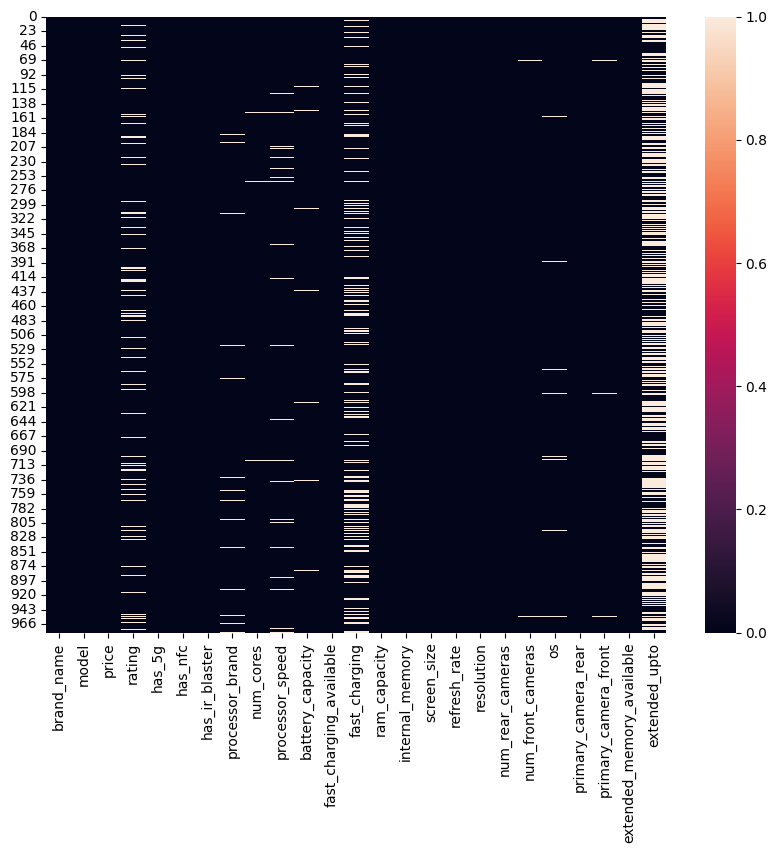

In [7]:
#VISUALISING THE DATAFRAME
#USING HEATMAP

plt.figure(figsize=(10,8))
sns.heatmap(df.isnull())
plt.show()

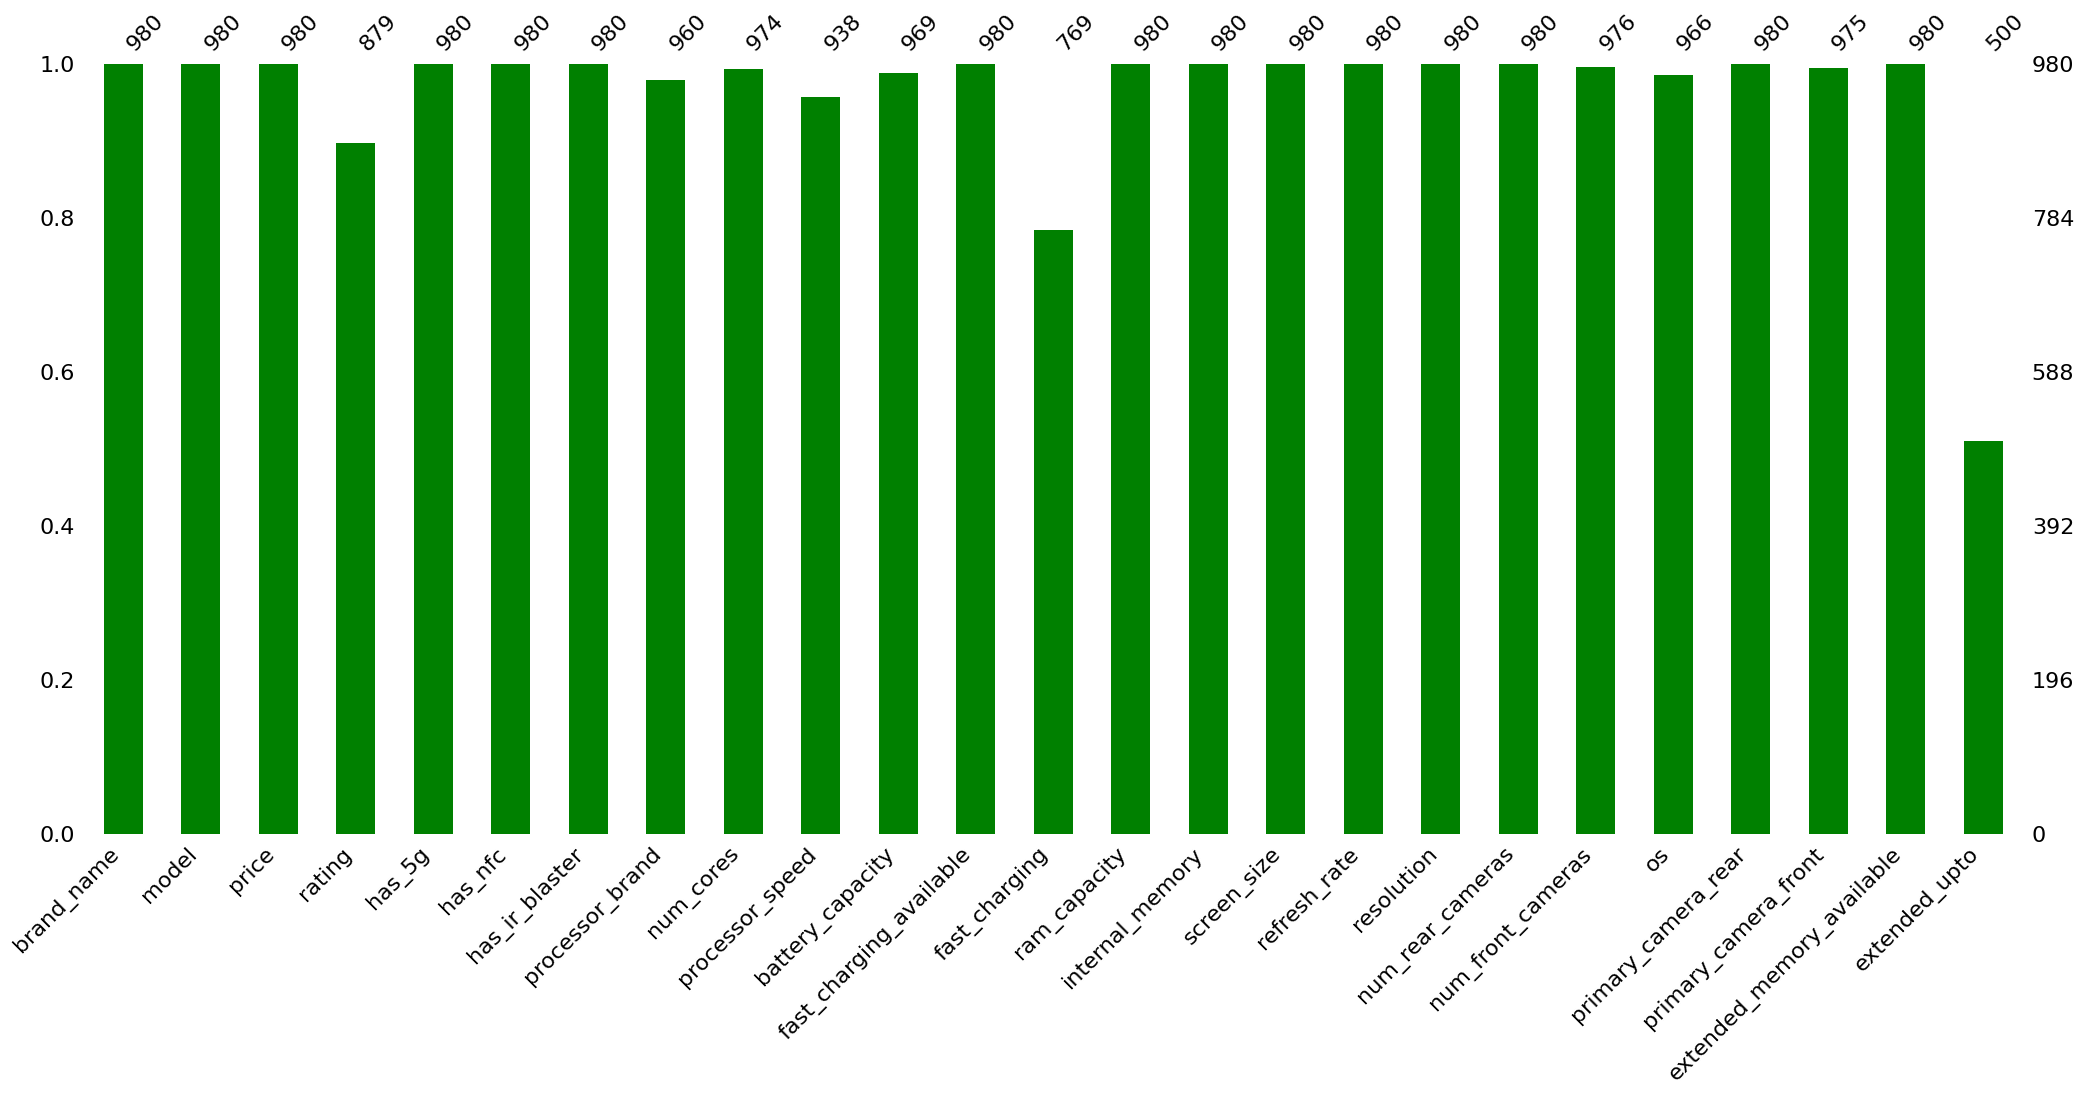

In [8]:
#THIS BARCHART WOULD GIVE US AN IDEA ABOUT HOW MANY MISSING VALUES ARE PRESENT IN EACH COLUMN

msno.bar(df,color='green')
plt.show()

In [9]:
#GETTING THE PERCENTAGE OF MISSING VALUE IN COLUMNS

per = df.isnull().sum()/df.shape[0]*100
per

brand_name                    0.000000
model                         0.000000
price                         0.000000
rating                       10.306122
has_5g                        0.000000
has_nfc                       0.000000
has_ir_blaster                0.000000
processor_brand               2.040816
num_cores                     0.612245
processor_speed               4.285714
battery_capacity              1.122449
fast_charging_available       0.000000
fast_charging                21.530612
ram_capacity                  0.000000
internal_memory               0.000000
screen_size                   0.000000
refresh_rate                  0.000000
resolution                    0.000000
num_rear_cameras              0.000000
num_front_cameras             0.408163
os                            1.428571
primary_camera_rear           0.000000
primary_camera_front          0.510204
extended_memory_available     0.000000
extended_upto                48.979592
dtype: float64

In [10]:
#FINDING THE COLUMNS HAVING MISSING VALUE > 50%

drop_clm = per[per > 50].keys()
drop_clm

Index([], dtype='object')

THERE ARE NO COLUMNS WHERE THERE IS MISSING VALUE MORE THAN 50% .

In [11]:
#TAKING ALL THE INTEGER & FLOAT FEATURE

num_var = df.select_dtypes(include=["int64","float64"]).columns
num_var

Index(['price', 'rating', 'num_cores', 'processor_speed', 'battery_capacity',
       'fast_charging_available', 'fast_charging', 'ram_capacity',
       'internal_memory', 'screen_size', 'refresh_rate', 'num_rear_cameras',
       'num_front_cameras', 'primary_camera_rear', 'primary_camera_front',
       'extended_memory_available', 'extended_upto'],
      dtype='object')

In [12]:
#FILLING THE MISSING VALUE USING SCIKIT LEARN

num_var = ['price', 'rating', 'num_cores', 'processor_speed', 'battery_capacity',
       'fast_charging_available', 'fast_charging', 'ram_capacity',
       'internal_memory', 'screen_size', 'refresh_rate', 'num_rear_cameras',
       'num_front_cameras', 'primary_camera_rear', 'primary_camera_front',
       'extended_memory_available', 'extended_upto']


#CREATING CLASS IMPUTER
imputer_median = SimpleImputer(strategy="median")

In [13]:
#FITING THE MODEL

imputer_median.fit(df[num_var])

SimpleImputer(strategy='median')

In [14]:
#CHECKING THE MEDIAN VALUES OF EACH COLUMN

imputer_median.statistics_

array([1.99945e+04, 8.00000e+01, 8.00000e+00, 2.30000e+00, 5.00000e+03,
       1.00000e+00, 3.30000e+01, 6.00000e+00, 1.28000e+02, 6.58000e+00,
       9.00000e+01, 3.00000e+00, 1.00000e+00, 5.00000e+01, 1.60000e+01,
       1.00000e+00, 1.02400e+03])

In [15]:
#FILLING THE MISSING VALUES WITH THE MEDIAN IN THE DATAFRAME


df[num_var] = imputer_median.transform(df[num_var])

In [16]:
#CHECKING THE NULL VALUES

df[num_var].isnull().sum()


price                        0
rating                       0
num_cores                    0
processor_speed              0
battery_capacity             0
fast_charging_available      0
fast_charging                0
ram_capacity                 0
internal_memory              0
screen_size                  0
refresh_rate                 0
num_rear_cameras             0
num_front_cameras            0
primary_camera_rear          0
primary_camera_front         0
extended_memory_available    0
extended_upto                0
dtype: int64

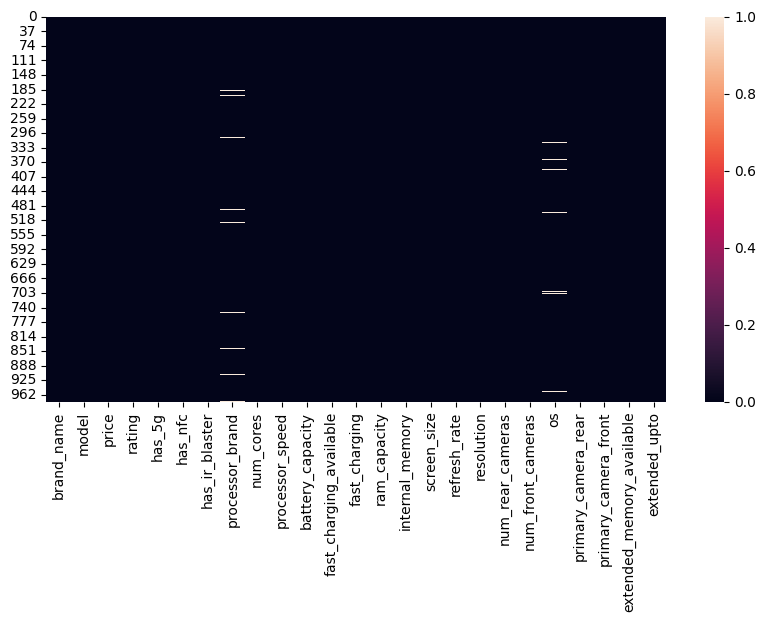

In [17]:
#VISUALISATION THROUGH HEATMAP

plt.figure(figsize=(10,5))
sns.heatmap(df.isnull())
plt.show()

In [18]:
#GETTING ALL THE CATEGORICAL VALUES

cat_var = df.select_dtypes(include=["O"]).columns
cat_var

Index(['brand_name', 'model', 'processor_brand', 'resolution', 'os'], dtype='object')

In [19]:
cat_var = ['brand_name', 'model', 'processor_brand', 'resolution', 'os']

#CREATING THE CLASS OF IMPUTER
imputer_most_frequent = SimpleImputer(strategy="most_frequent")

#FITTING THE MODEL
imputer_most_frequent.fit(df[cat_var])

#CHECKING THE CONVERSION

imputer_most_frequent.statistics_

array(['xiaomi', 'Apple iPhone 11', 'snapdragon',
       '1080\u2009x\u20092400\u2009', 'android'], dtype=object)

In [20]:
#NOW PUTTING THE MODE VALUES INSIDE THE DATASET
 
df[cat_var] = imputer_most_frequent.transform(df[cat_var])

In [21]:
#NOW CHECKING THE NULL VALUES

print("NUMBER OF NULL VALUES IN ALL FEATURES")
print("-------------------------------------")
df.isnull().sum()

NUMBER OF NULL VALUES IN ALL FEATURES
-------------------------------------


brand_name                   0
model                        0
price                        0
rating                       0
has_5g                       0
has_nfc                      0
has_ir_blaster               0
processor_brand              0
num_cores                    0
processor_speed              0
battery_capacity             0
fast_charging_available      0
fast_charging                0
ram_capacity                 0
internal_memory              0
screen_size                  0
refresh_rate                 0
resolution                   0
num_rear_cameras             0
num_front_cameras            0
os                           0
primary_camera_rear          0
primary_camera_front         0
extended_memory_available    0
extended_upto                0
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    float64
 3   rating                     980 non-null    float64
 4   has_5g                     980 non-null    bool   
 5   has_nfc                    980 non-null    bool   
 6   has_ir_blaster             980 non-null    bool   
 7   processor_brand            980 non-null    object 
 8   num_cores                  980 non-null    float64
 9   processor_speed            980 non-null    float64
 10  battery_capacity           980 non-null    float64
 11  fast_charging_available    980 non-null    float64
 12  fast_charging              980 non-null    float64
 13  ram_capacity               980 non-null    float64

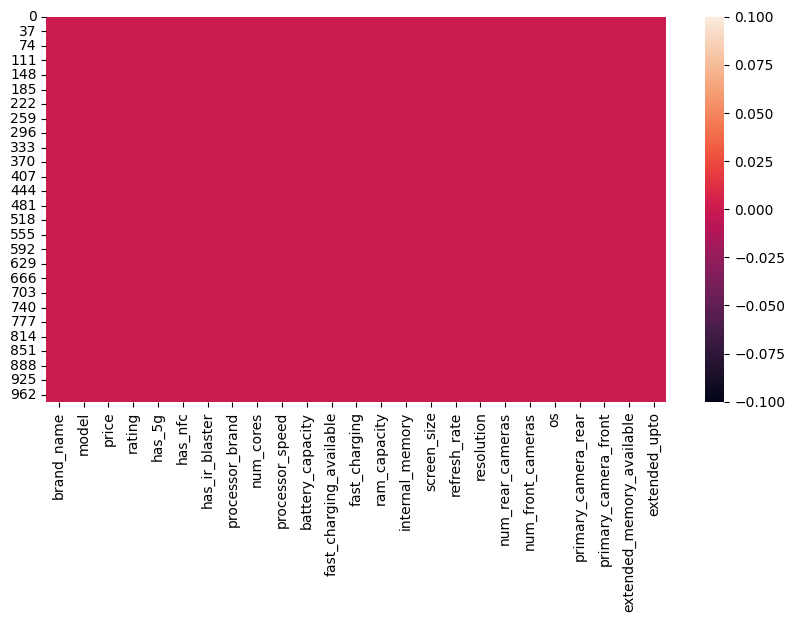

In [23]:
#VISUALISATION THROUGH HEATMAP

plt.figure(figsize=(10,5))
sns.heatmap(df.isnull())
plt.show()

In [24]:
df.isnull().sum().sum()

0

WE HAVE SUCCESSFULLY FILLED THE MISSING VALUE OF THE DATASET

In [25]:
#CHECKING FOR DUPLICATE VALUES
df.duplicated().sum()

0

THERE ARE NO DUPLICATE ROWS IN THE DATASET!!

In [26]:
#UNIQUE VALUES IN EACH COLUMN

df.nunique()

brand_name                    46
model                        980
price                        379
rating                        30
has_5g                         2
has_nfc                        2
has_ir_blaster                 2
processor_brand               13
num_cores                      3
processor_speed               35
battery_capacity              89
fast_charging_available        2
fast_charging                 32
ram_capacity                   9
internal_memory                8
screen_size                   79
refresh_rate                   6
resolution                    83
num_rear_cameras               4
num_front_cameras              2
os                             3
primary_camera_rear           18
primary_camera_front          24
extended_memory_available      2
extended_upto                  7
dtype: int64

# DESCRIPTIVE STATISTICS

In [27]:
df.describe()

,price,rating,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
count,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000
mean,32520.504082,78.437755,7.773469,2.421765,4819.793878,0.854082,43.300000,6.560204,141.036735,6.536765,92.256122,2.814286,1.029592,50.319286,16.586122,0.630612,877.093878
std,39531.812669,7.030591,0.834466,0.454757,1004.036245,0.353205,30.836247,2.744378,107.134516,0.349162,28.988052,0.776441,0.169545,33.000968,10.849073,0.482885,298.917207
min,3499.000000,60.000000,4.000000,1.200000,1821.000000,0.000000,10.000000,1.000000,8.000000,3.540000,60.000000,1.000000,1.000000,2.000000,0.300000,0.000000,32.000000
25%,12999.000000,75.000000,8.000000,2.050000,4500.000000,1.000000,25.000000,4.000000,64.000000,6.500000,60.000000,2.000000,1.000000,24.000000,8.000000,0.000000,1024.000000
50%,19994.500000,80.000000,8.000000,2.300000,5000.000000,1.000000,33.000000,6.000000,128.000000,6.580000,90.000000,3.000000,1.000000,50.000000,16.000000,1.000000,1024.000000
75%,35491.500000,84.000000,8.000000,2.840000,5000.000000,1.000000,65.000000,8.000000,128.000000,6.670000,120.000000,3.000000,1.000000,64.000000,16.000000,1.000000,1024.000000
max,650000.000000,89.000000,8.000000,3.220000,22000.000000,1.000000,240.000000,18.000000,1024.000000,8.030000,240.000000,4.000000,2.000000,200.000000,60.000000,1.000000,2048.000000


In [28]:
df.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
0,oneplus,OnePlus 11 5G,54999.0,89.0,True,True,False,snapdragon,8.0,3.2,...,6.70,120.0,1440 x 3216,3.0,1.0,android,50.0,16.0,0.0,1024.0
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989.0,81.0,True,False,False,snapdragon,8.0,2.2,...,6.59,120.0,1080 x 2412,3.0,1.0,android,64.0,16.0,1.0,1024.0
2,samsung,Samsung Galaxy A14 5G,16499.0,75.0,True,False,False,exynos,8.0,2.4,...,6.60,90.0,1080 x 2408,3.0,1.0,android,50.0,13.0,1.0,1024.0
3,motorola,Motorola Moto G62 5G,14999.0,81.0,True,False,False,snapdragon,8.0,2.2,...,6.55,120.0,1080 x 2400,3.0,1.0,android,50.0,16.0,1.0,1024.0
4,realme,Realme 10 Pro Plus,24999.0,82.0,True,False,False,dimensity,8.0,2.6,...,6.70,120.0,1080 x 2412,3.0,1.0,android,108.0,16.0,0.0,1024.0


# EXPLORATORY DATA ANALYSIS

IT REFERS TO THE METHOD OF STUDYING AND EXPLORING RECORDS SETS TO APPREHEND THEIR PREDOMINANT TRAITS,DISCOVER PATTERNS , LOCATE OUTLIERS AND IDENTIFY RELATIONSHIPS BETWEEN  VARIABLES.

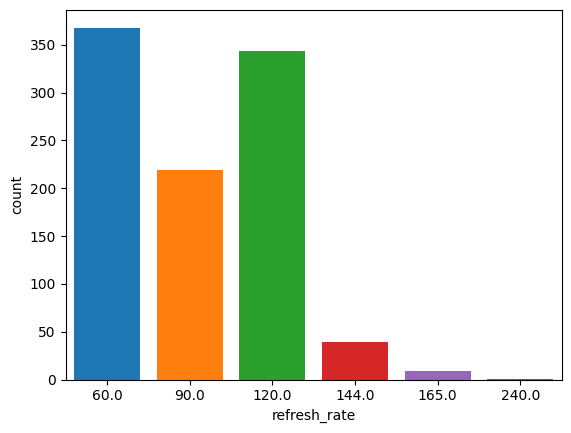

In [29]:
#USING COUNTPLOT TO VISUALISE REFRESH RATE

sns.countplot(x = df['refresh_rate'], data = df , saturation= 1)
plt.show()

REFRESH RATE OF ALMOST 350 PHONES IS 60

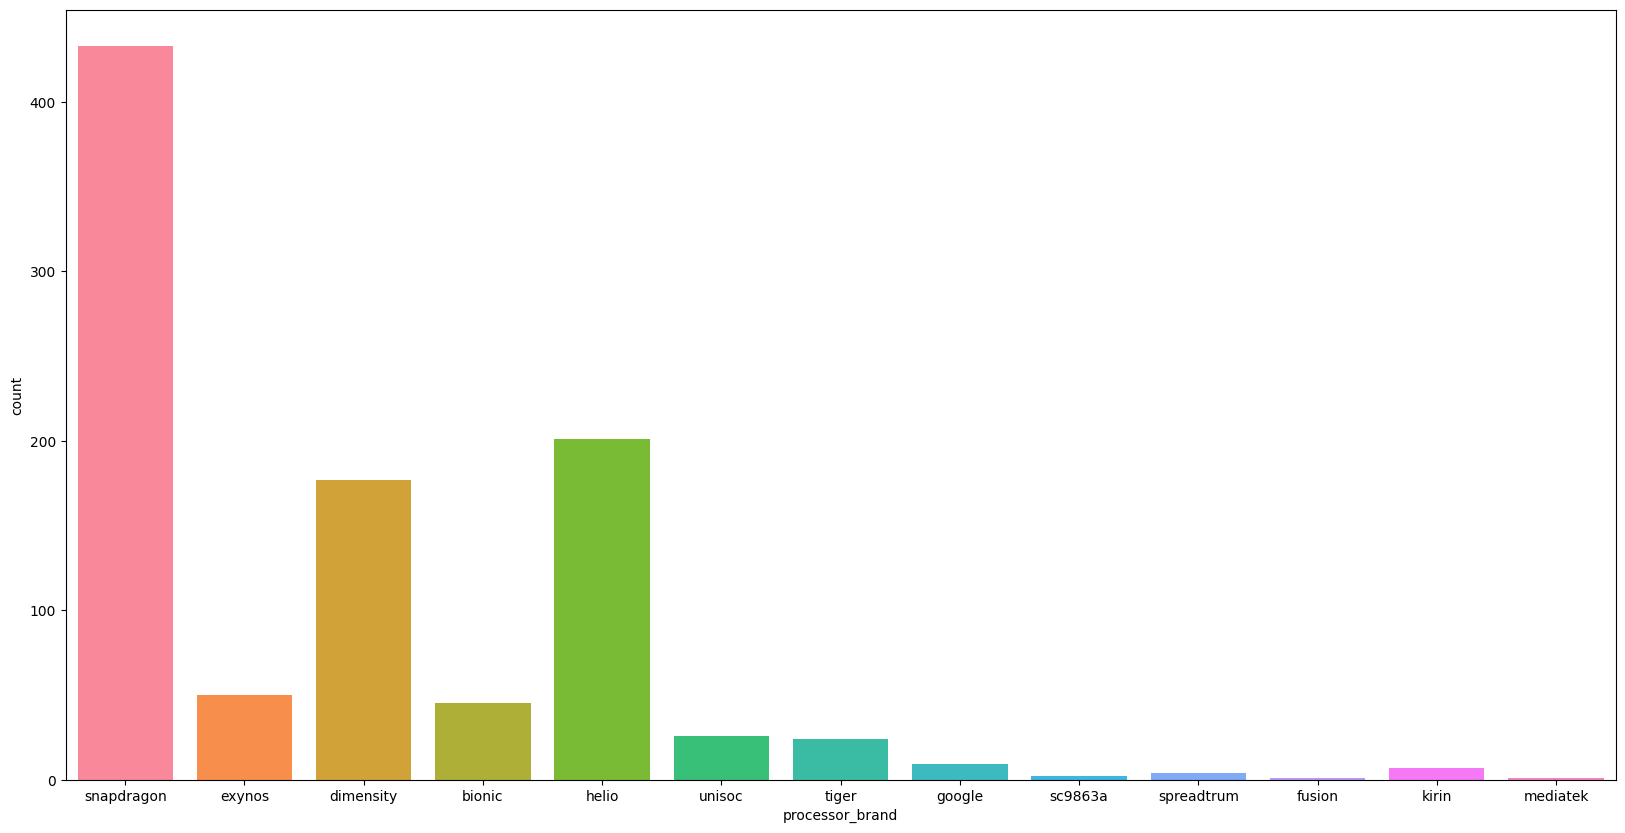

In [30]:
#CHECKING THE DIFFERENT PROCESSOR BRANDS
#USING COUNTPLOT


plt.figure(figsize = (20,10))
sns.countplot(x = df['processor_brand'], data = df , saturation= 1)
plt.show()

FROM THE ABOVE GRAPH IT CAN BE CONCLUDED THAT THE MOST WIDELY USED PROCESSOR BRAND IS "SNAPDRAGON" FOLLOWED BY "HELIO" AND "DIMENSITY".

FROM THIS OBSERVATION I WOULD LIKE TO DRAW A CONCLUSION THAT "SNAPDRAGON" IS THE MOST POPULAR PROCESSOR BRAND AND IS USED BY MOST OF THE PEOPLE.

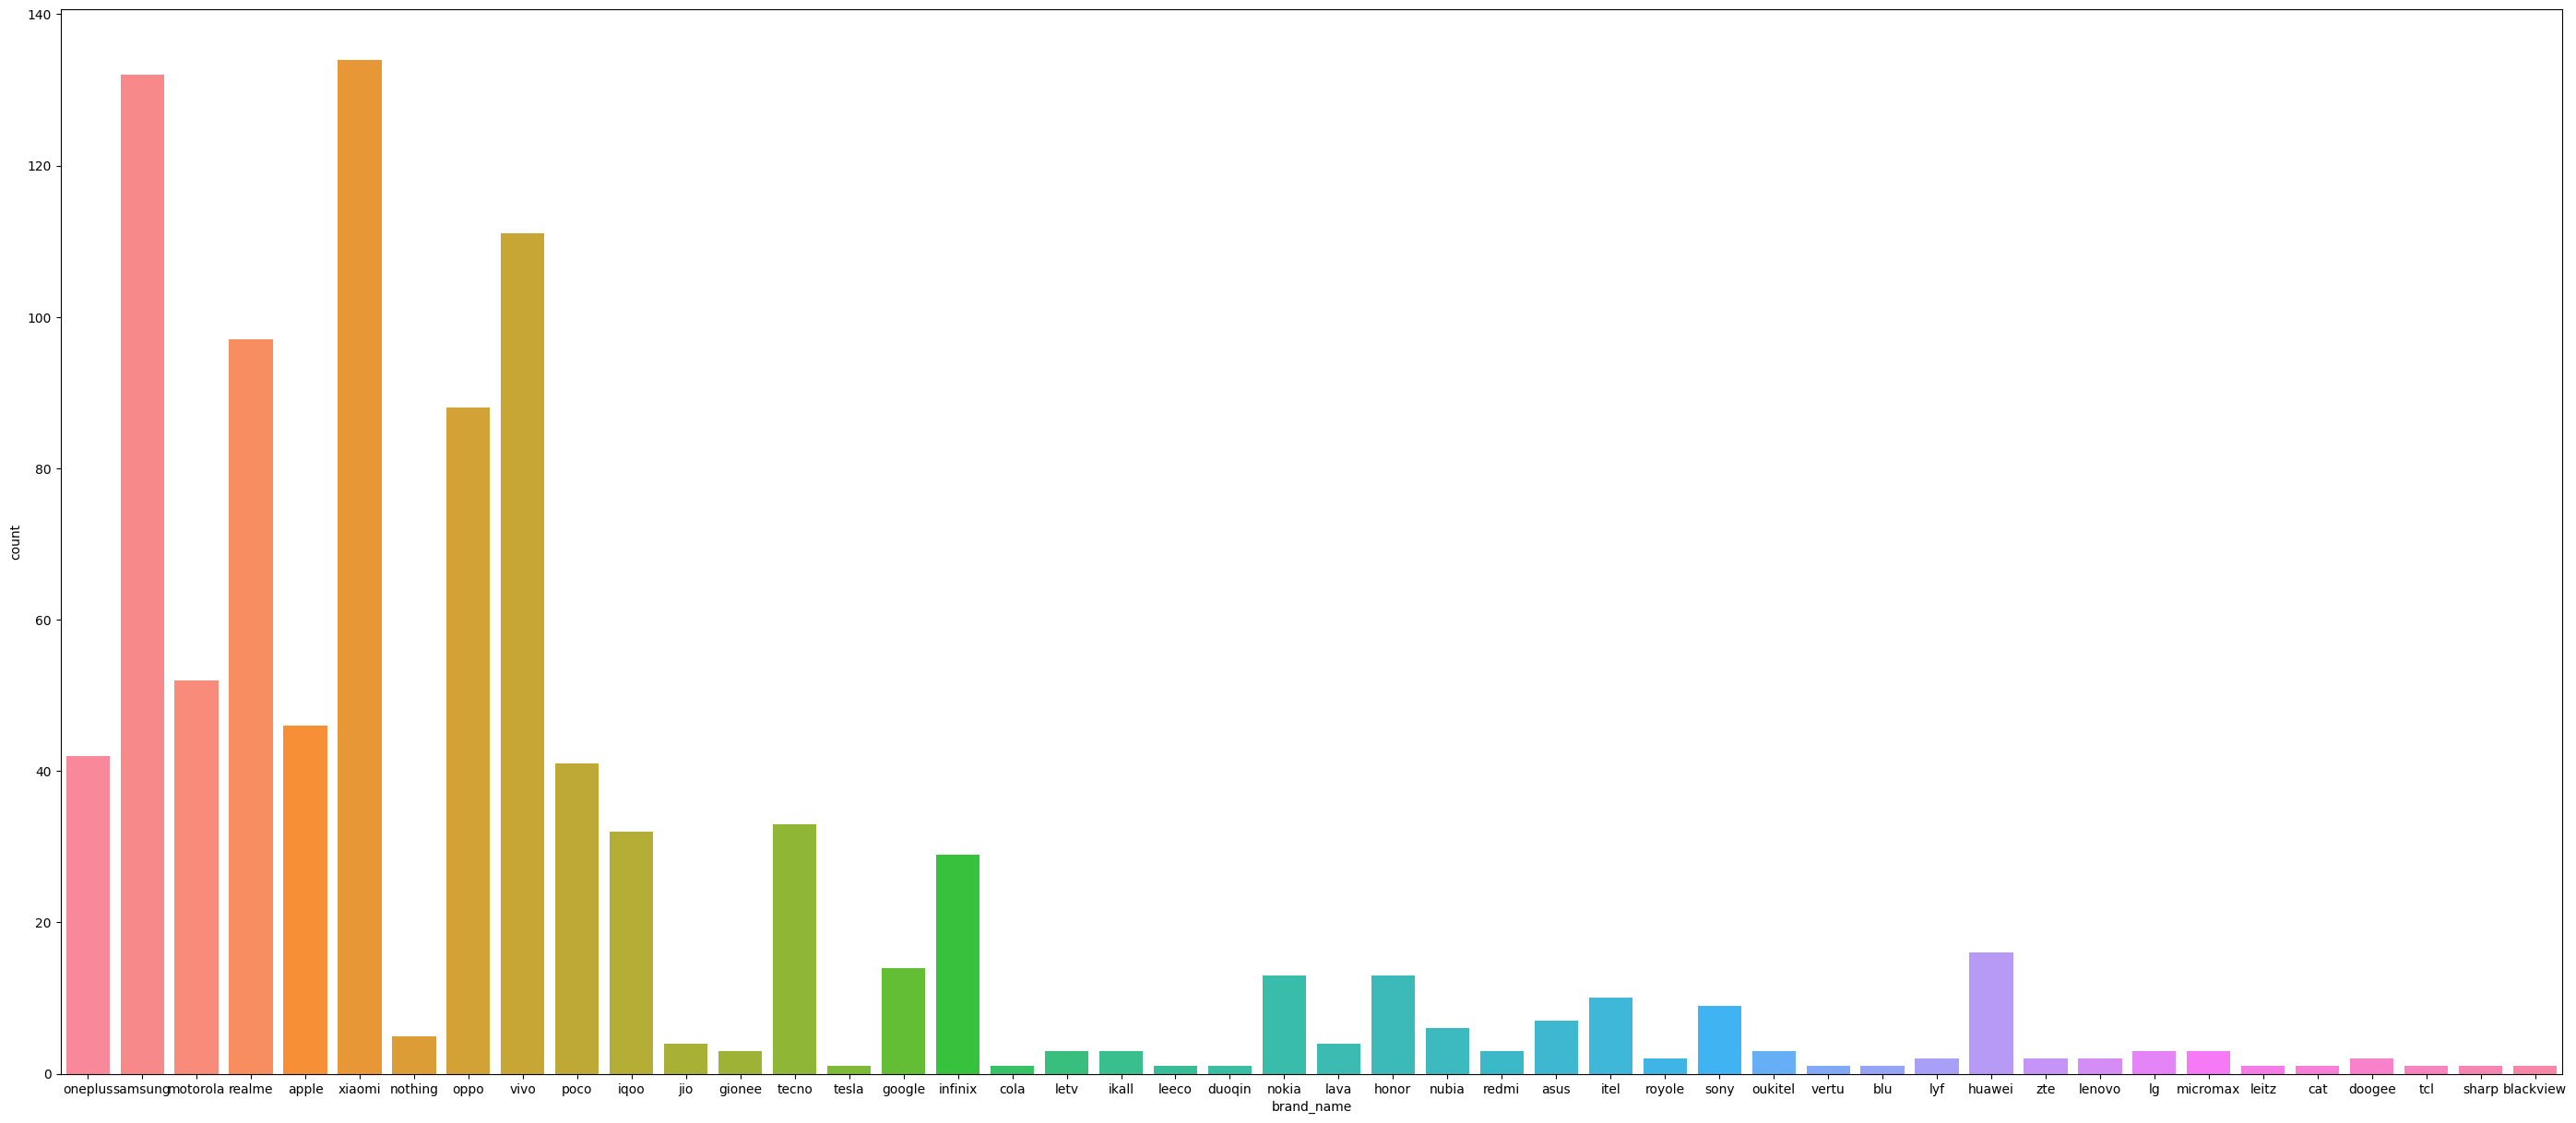

In [31]:
#CHECKING THE DIFFERENT BRAND NAMES
#USING COUNTPLOT


plt.figure(figsize = (35,15))
sns.countplot(x = df['brand_name'], data = df , saturation= 1)
plt.show()

FROM THE ABOVE GRAPH IT CAN BE CONCLUDED THAT "XIAOMI" AND "SAMSUNG" ARE THE MOST USED BRANDS FOLLWED BY MANY OTHER BRANDS.

In [32]:
#COLLECTING INFORMATION ABOUT THE OPERATING SYSTEM

df['os'].value_counts()

android    923
ios         46
other       11
Name: os, dtype: int64

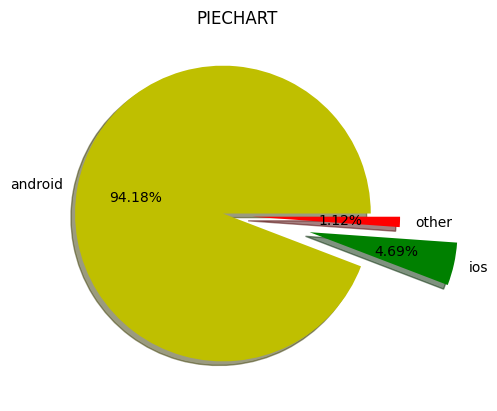

In [33]:
#USING PIECHART CHECK WHAT ARE THE DIFFERENT OPERATING SYSTEMS

name = ['android' , 'ios' , 'other']
number = [923 , 46 , 11]
explode = [0.1 , 0.5 , 0.1]
colors = ['y' , 'g' , 'r']
plt.pie(number , labels = name ,explode = explode ,colors = colors , shadow = True , autopct = "%0.2f%%")
plt.title("PIECHART")
plt.show()

FROM THE ABOVE PIE CHART WE CAN CLEARLY SEE THAT ANDROID IS THE MOST COMMONLY USED OPERATING SYSTEM OUT OF ALL.THIS MAY BE BECAUSE OF THE REASON THAT ANDROID IS COMPATIBLE WITH ALL THE MAJOR BROWSERS WITHIN YOUR MOBILE ECOSYSTEM WHICH ENDEARS IT TO ALL THE MOBILE USERS.

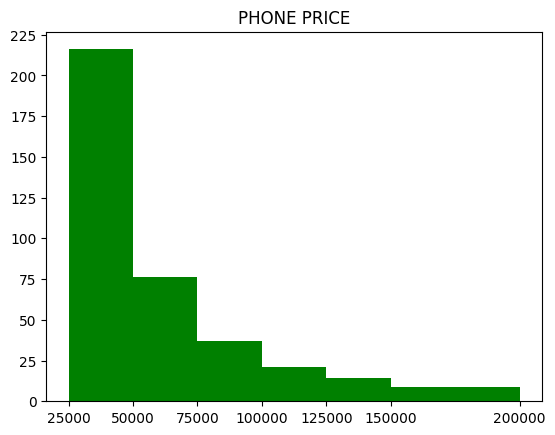

In [34]:
#GETTING THE PRICE DISTRIBUTION OF THE MOBILE PHONES
#USING HISTPLOT


bins = [25000 , 50000 , 75000 , 100000 , 125000 , 150000 , 200000]
plt.hist(df['price']  , bins = bins ,color = 'GREEN')
plt.xticks([25000 , 50000 , 75000 , 100000 , 125000 , 150000 , 200000])
plt.yticks([0 , 25 , 50 , 75 , 100 , 125 , 150 , 175 , 200 , 225])
plt.title('PHONE PRICE')
plt.show()

FROM THE ABOVE GRAPH IT CAN BE CONCLUDED THAT THE NUMBER OF PHONES HAVING PRICE THE BETWEEN 25000 TO 50000 IS THE LARGEST(ALMOST 225).

ALSO , THERE ARE COMPARITIVELY LESSER NUMBER OF PEOPLE HAVING THE PHONE WORTH BETWEEN 50000 TO 75000...HENCE WITH THE GIVEN GRAPH I WOULD LIKE TO MAKE THE ASSUMPTION THAT PEOPLE PREFER HAVING PHONE WORTH AROUND 25K TO 50K.

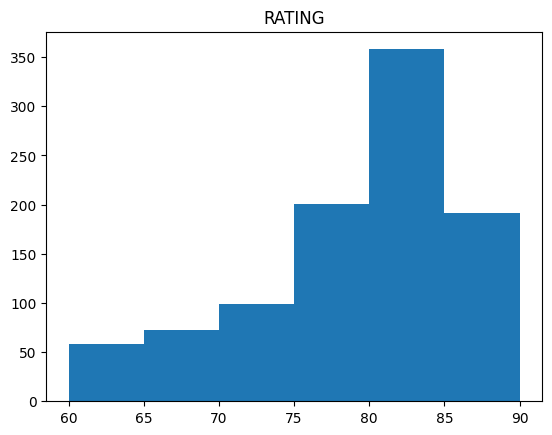

In [35]:
#GETTING THE PRICE DISTRIBUTION OF THE MOBILE PHONES
#USING HISTPLOT


bins = [60 , 65 , 70 ,75 ,80 ,85 , 90]
plt.hist(df['rating'] , bins = bins)
plt.title('RATING')
plt.show()

MOST OF THE PEOPLE HAVE GIVEN GOOD RATINGS ABOUT THE MOBILE PHONES.....THE MOST GIVEN RATING IS  BETWEEN 80 TO 85.

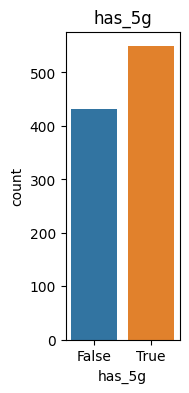

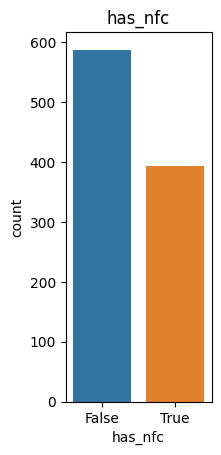

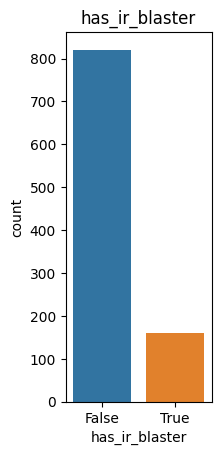

In [36]:
#CHECKING THE WEIGHTAGE OF SMOKERS AND NON SMOKERS
#USING COUNTPLOT

var = ['has_5g' , 'has_nfc' , 'has_ir_blaster']
plt.figure(figsize = (5,4))
for i,a in enumerate(var):
    plt.subplot(1,3,i+1)
    sns.countplot(x = a , data = df ).set_title(a)
    plt.show()



WE HAVE PLOTTED THE ABOVE THREE GRAPHS TO VISUALISE THE PRESENCE  OR ABSENCE OF MULTIPLE FEATURES LIKE 5_G , nfc , ir_blaster.

THE NUMBER OF PHONES HAVING 5_G TECHNOLOGY IS MORE THAN THOSE NOT HAVING THIS TECHNOLOGY.ALSO LESSER NUMBER OF PHONES ARE HAVING THE nfc FACILITY.
NEAR FIELD COMMUNICATION (NFC) ALLOWS US TO SHARE SMALL PAYLOADS OF DATA BETWEEN AN NFC TAG AND AN ANDROID POWERED DEVICE.....MOREOVER,LESSER NUMBER OF PHONES ARE HAVING THE IR_BLASTER FEATURE.THE IR BLASTER FEATURE ALLOWS US TO USE OUR PHONES AS REMOTE CONTROL FOR THE T.V , A.C ,MUSIC PLAYLER.


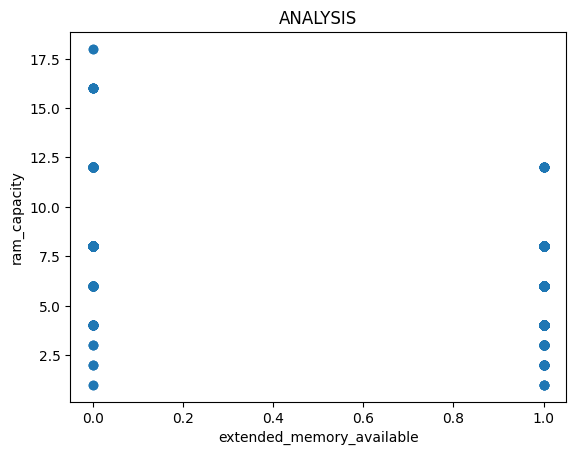

In [37]:
#ANALYSING VARIOUS FEATURES USING SCATTERPLOT

plt.scatter(df['extended_memory_available'] , df['ram_capacity'])
plt.title("ANALYSIS")
plt.xlabel("extended_memory_available")
plt.ylabel("ram_capacity")
plt.show()

ASSUMING 1 STANDS FOR TRUE AND 0 STANDS FOR FALSE.

FROM THE ABOVE GRAPH IT CAN BE CONCLUDED THAT THE PHONES NOT HAVING THE EXTENDED MEMORY AVAILABILITY HAVE BETTER RAM CAPCITY THAN THOSE HAVING THE FEATURE OF EXTENDED MEMORY.

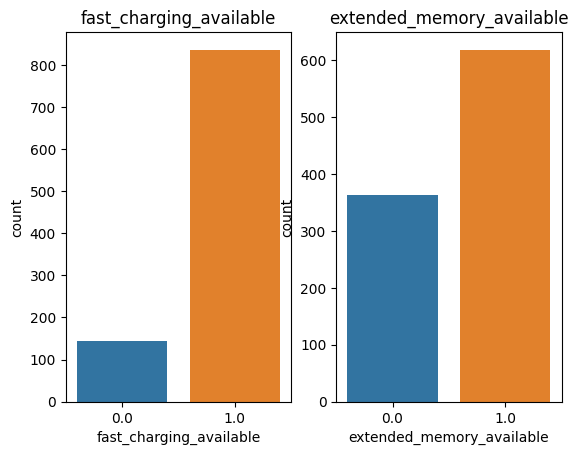

In [38]:
#USING COUNTPLOT TO CHECK THE AVAILABILY OF FAST CHARGING FACILITY


plt.subplot(1,2,1)
sns.countplot(x = 'fast_charging_available' , data = df ).set_title('fast_charging_available')
plt.subplot(1,2,2)
sns.countplot(x = 'extended_memory_available' , data = df ).set_title('extended_memory_available')
plt.show()

ASSUMING THAT 1 STANDS FOR TRUE AND 0 FOR FALSE.

MOST OF THE DEVICES ARE HAVING THE FEATURE OF FAST CHARGING AND EXTENDED MEMORY....BECAUSE OF THESE FEATURES THE CUSTOMERS OF THESE PHONES ARE MORE

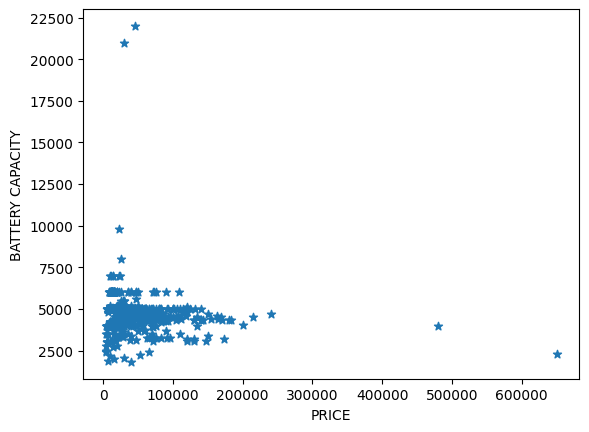

In [39]:
#USING SCATTER PLOT FOR VISUALISATION OF PRICE AND BATTERY CAPACITY

plt.scatter(df['price'] , df['battery_capacity'] , marker = "*")
plt.xlabel("PRICE")
plt.ylabel("BATTERY CAPACITY")
plt.show()

WITH THE GRAPH ABOVE WE CLEARY SEE THAT THE MAXIMUM NUMBER OF PHONES ARE HAVING PRICE UNDER 100000 ALSO  ,  THE BATTERY CAPACITY OF MOST OF THE PHONES IS UNDER 7500....

MOREOVER WE CAN ALSO SEE THE OUTLIERS IN THE TWO GIVEN FEATURES....THERE ARE TWO PHONES HAVING PRICE 5 LAKHS AND 6 LAKHS....ALSO THE BATTERY CAPACITY OF TWO PHONES ARE ALMOST 20000 AND 22500.... THEY CAN DEFINITELY BE CONSIDERED AS OUTLIERS AS THEIR VALUES ARE MUCH DIFFERENT FROM OTHER VALUES IN THE SAME FEATURE.

In [40]:
#COLLECTING INFORMATION ABOUT THE OPERATING SYSTEM

df['num_cores'].value_counts()

8.0    905
6.0     39
4.0     36
Name: num_cores, dtype: int64

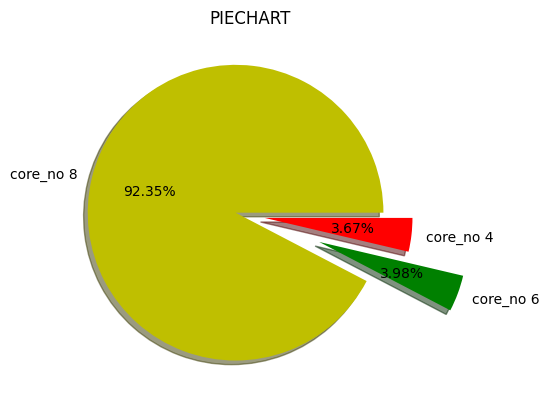

In [41]:
#USING PIECHART CHECK WHAT ARE THE DIFFERENT OPERATING SYSTEMS

name = ['core_no 8' , 'core_no 6' , 'core_no 4']
number = [905 , 39 , 36]
explode = [0.1 , 0.5 , 0.1]
colors = ['y' , 'g' , 'r']
plt.pie(number , labels = name ,explode = explode ,colors = colors , shadow = True , autopct = "%0.2f%%")
plt.title("PIECHART")
plt.show()

THE NUMBER OF CORES IN A MOBILE PHONE PLAY A VITAL ROLE IN DECIDING THE PRICE OF THE PHONE...MOST OF THE PHONES ARE HAVING 8 CORE NUMBERS WHICH IS FOLLOWED BT 6 AND 4...THE CORES IN A PHONE ENSURE THAT THE ACION IS DONE ON TIME....SINCE MOST OF THE PHONES ARE HAVING 8_CORES THEREFORE IT CAN BE CONCLUDED THAT FOR ALMOST ALL THE MOBILE PHONES IMPLEMENTAION AND EXECUTION OF THE TASK IS EASIER.

In [42]:
df['num_rear_cameras'].unique()

array([3., 2., 4., 1.])

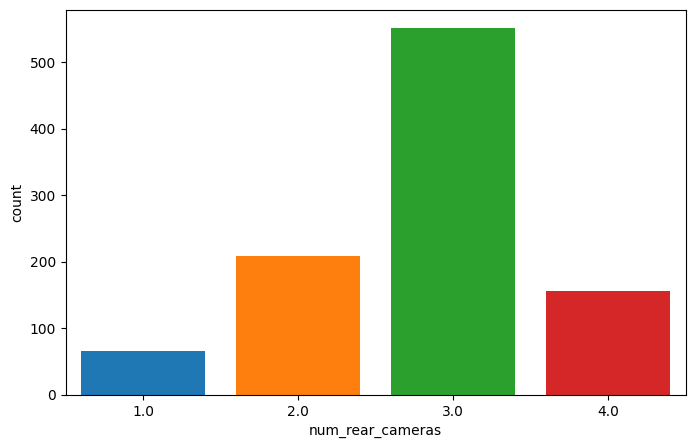

In [43]:
#CHECKING THE DIFFERENT PROCESSOR BRANDS
#USING COUNTPLOT


plt.figure(figsize = (8,5))
sns.countplot(x = df['num_rear_cameras'], data = df , saturation= 1)
plt.show()

ALMOST 500 PHONES ARE HAVING 3 REAR CAMERAS , 200 PHONES HAVING 2 REAR CAMERAS , 150 PHONES HAVING 4 REAR CAMERAS.

THE REAR CAMERA IS MET TO CAPTURE A VERY LARGE ASPECT RATION & A FIELD OF VIEW OF 3D OBJECT...HENCE THE MORE IS THE NUMBER OF REAR CAMERA , THE BETTER THE USER EXPERIENCE I!!

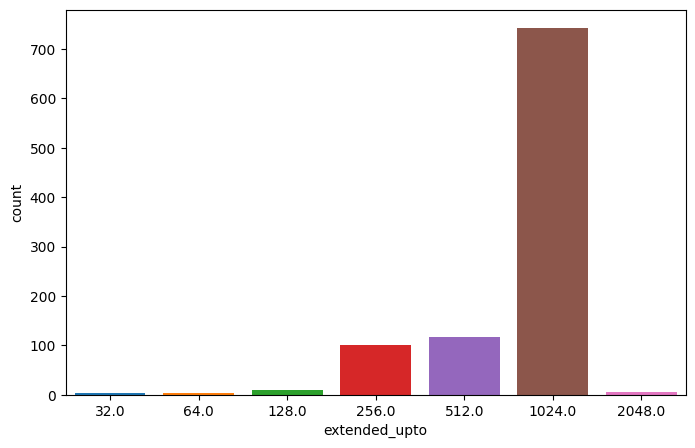

In [44]:
#CHECKING THE DIFFERENT PROCESSOR BRANDS
#USING COUNTPLOT


plt.figure(figsize = (8,5))
sns.countplot(x = df['extended_upto'], data = df , saturation= 1)
plt.show()

IN MOST OF THE CASES THE SPACE IS EXTENDED UPTO 1024....THE EXTENDED MEMORY PROVIDES MUCH BETTER USER EXPERIENCE

# HANDLING OUTLIERS

In [45]:
#GETTING ALL THE NUMERICAL CATEGORIES

num_var = df.select_dtypes(include=["int64","float64"]).columns
num_var

Index(['price', 'rating', 'num_cores', 'processor_speed', 'battery_capacity',
       'fast_charging_available', 'fast_charging', 'ram_capacity',
       'internal_memory', 'screen_size', 'refresh_rate', 'num_rear_cameras',
       'num_front_cameras', 'primary_camera_rear', 'primary_camera_front',
       'extended_memory_available', 'extended_upto'],
      dtype='object')

C:\Users\Ritika Kumari\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Ritika Kumari\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Ritika Kumari\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\User

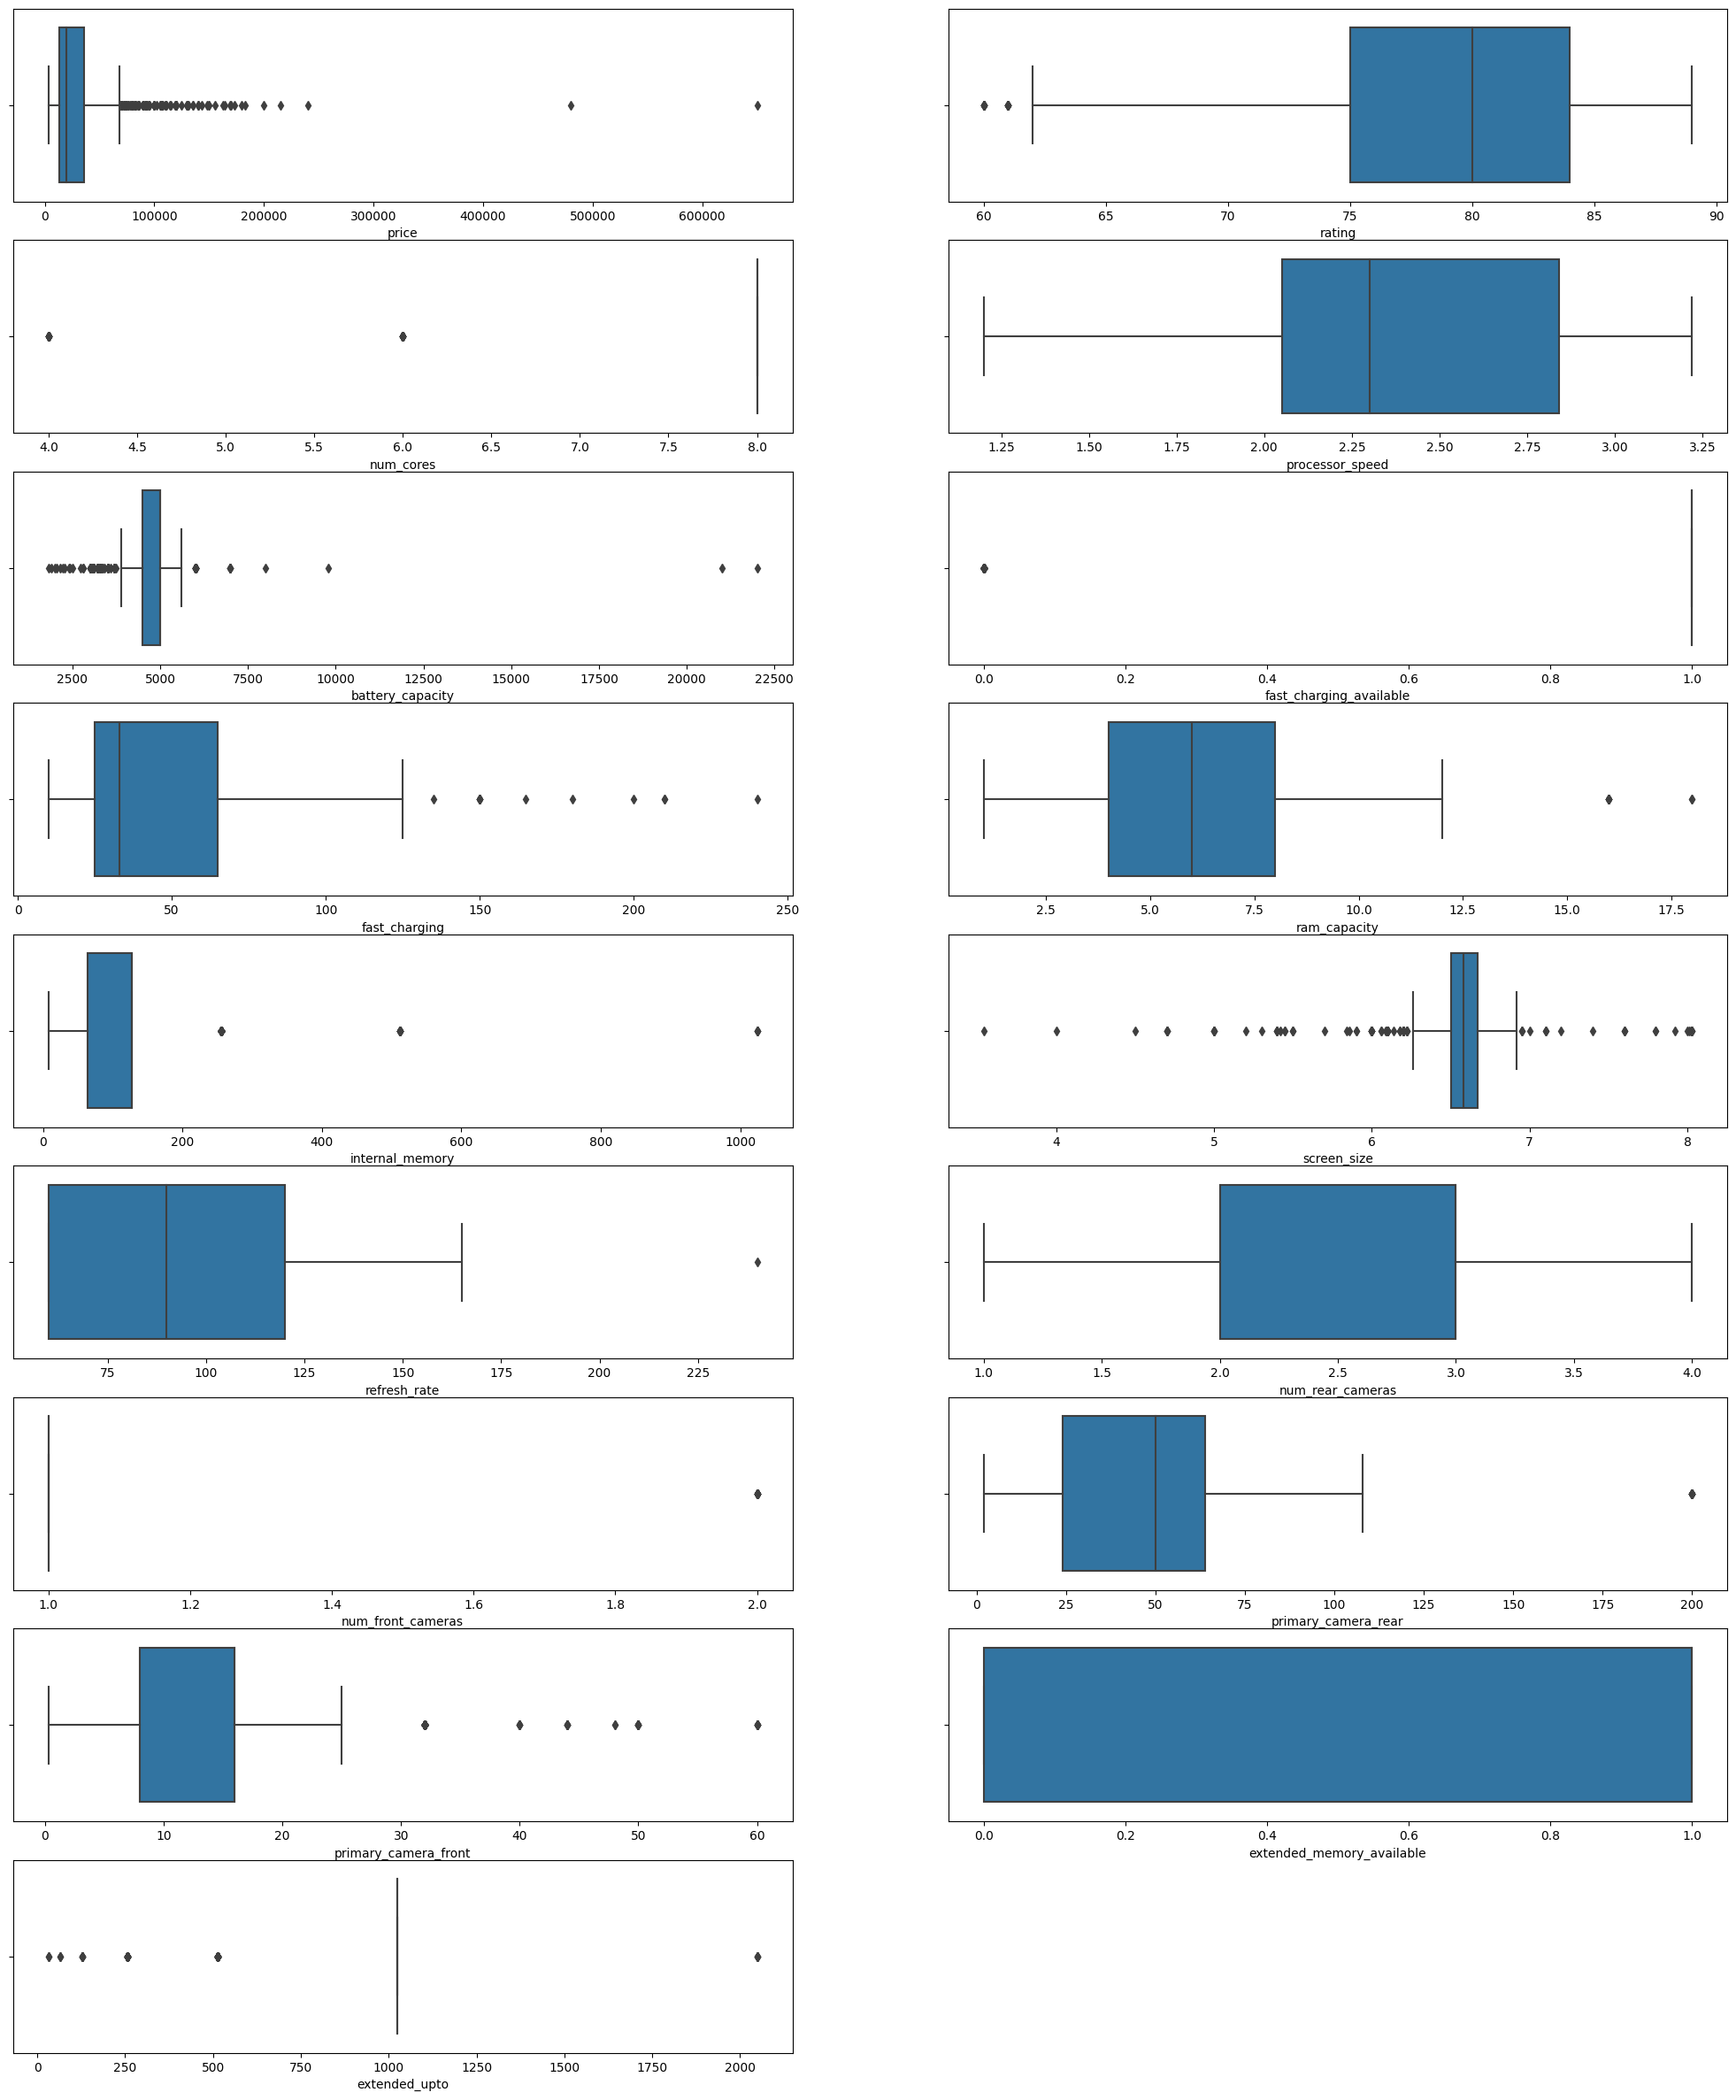

In [46]:
#PLOTTING BOXPLOT TO CHECK VISUALISE OUTLIERS(IF ANY) IN THE DATAFRAME


num_var =['price', 'rating', 'num_cores', 'processor_speed', 'battery_capacity',
       'fast_charging_available', 'fast_charging', 'ram_capacity',
       'internal_memory', 'screen_size', 'refresh_rate', 'num_rear_cameras',
       'num_front_cameras', 'primary_camera_rear', 'primary_camera_front',
       'extended_memory_available', 'extended_upto']


plt.figure(figsize=(25,30))
for i , var in enumerate(num_var):
    plt.subplot(9,2,i+1)
    sns.boxplot(df[var])
    plt.show

In [47]:
#LISTING OUT VARIABLES HAVING OUTLIERS

out_lier = ['price', 'rating', 'num_cores','battery_capacity','fast_charging_available','fast_charging', 'ram_capacity',
            'internal_memory', 'screen_size', 'refresh_rate','num_front_cameras', 'primary_camera_rear', 'primary_camera_front',
            'extended_upto']


# HANDLING OUTLIERS USING IQR METHOD

In [48]:
#SORTING THE DATAFRAME


df['price'] = sorted(df['price'])
df['rating'] = sorted(df['rating'])
df['num_cores'] = sorted(df['num_cores'])
df['battery_capacity'] = sorted(df['battery_capacity'])
df['fast_charging_available'] = sorted(df['fast_charging_available'])
df['fast_charging'] = sorted(df['fast_charging'])
df['ram_capacity'] = sorted(df['ram_capacity'])
df['internal_memory'] = sorted(df['internal_memory'])
df['screen_size'] = sorted(df['screen_size'])
df['refresh_rate'] = sorted(df['refresh_rate'])
df['num_front_cameras'] = sorted(df['num_front_cameras'])
df['primary_camera_rear'] = sorted(df['primary_camera_rear'])
df['primary_camera_front'] = sorted(df['primary_camera_front'])
df['extended_upto'] = sorted(df['extended_upto'])



In [49]:
def remove_outlier(data , column , lower_bound =0.25,upper_bound = 0.75):
    
    #FINDING q1 , q3 , iqr
    q1 = data[column].quantile(lower_bound)
    q3 = data[column].quantile(upper_bound)
    iqr = q3 - q1
    
    #FINDING UPPER AND LOWER BOUND
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    print("-------------")
    print ("lower limit ( ", column ,  ") : ", lower_bound) 
    print ("upper limit ( ", column ,  ") : ", upper_bound)  
    print("-------------")
    

out_lier = ['price', 'rating', 'num_cores','battery_capacity','fast_charging_available','fast_charging', 'ram_capacity',
            'internal_memory', 'screen_size', 'refresh_rate','num_front_cameras', 'primary_camera_rear', 'primary_camera_front',
            'extended_upto']





#USING LOOPS TO FIND THE UPPER AND LOWER LIMITS

for column in out_lier:
    remove_outlier(df , column) 

-------------
lower limit (  price ) :  -20739.75
upper limit (  price ) :  69230.25
-------------
-------------
lower limit (  rating ) :  61.5
upper limit (  rating ) :  97.5
-------------
-------------
lower limit (  num_cores ) :  8.0
upper limit (  num_cores ) :  8.0
-------------
-------------
lower limit (  battery_capacity ) :  3750.0
upper limit (  battery_capacity ) :  5750.0
-------------
-------------
lower limit (  fast_charging_available ) :  1.0
upper limit (  fast_charging_available ) :  1.0
-------------
-------------
lower limit (  fast_charging ) :  -35.0
upper limit (  fast_charging ) :  125.0
-------------
-------------
lower limit (  ram_capacity ) :  -2.0
upper limit (  ram_capacity ) :  14.0
-------------
-------------
lower limit (  internal_memory ) :  -32.0
upper limit (  internal_memory ) :  224.0
-------------
-------------
lower limit (  screen_size ) :  6.245
upper limit (  screen_size ) :  6.925
-------------
-------------
lower limit (  refresh_rate ) :

In [50]:
#CAPPING : changing the outliers to upper and lower limits
#MAKING A COPY OF THE DATAFRAME

out_lier = ['price', 'rating', 'num_cores','battery_capacity','fast_charging_available','fast_charging', 'ram_capacity',
            'internal_memory', 'screen_size', 'refresh_rate','num_front_cameras', 'primary_camera_rear', 'primary_camera_front',
            'extended_upto']
df_cap = df.copy()

def cap_out_lier(var,upper_limit,lower_limit):
    df_cap[var]=np.where(
    df_cap[var]>upper_limit,
    upper_limit,
    np.where(
    df_cap[var]<lower_limit,
    lower_limit,
    df_cap[var]))
    

    
cap_out_lier("price",   69230.25 , -20739.75)
cap_out_lier("rating",  97.5 , 61.5)
cap_out_lier("num_cores",  8.0 , 8.0)
cap_out_lier("battery_capacity",  5750.0 , 3750.0)
cap_out_lier("fast_charging_available",  1.0 ,1.0)
cap_out_lier("fast_charging",  125.0 ,-35.0)
cap_out_lier("ram_capacity",  14.0 ,-2.0)
cap_out_lier("internal_memory",  224.0 ,-32.0)
cap_out_lier("screen_size",  6.925 , 6.245)
cap_out_lier("refresh_rate",  210.0 ,-30.0)
cap_out_lier("num_front_cameras",  1 , 1)
cap_out_lier("primary_camera_rear",  124.0 ,-36.0)
cap_out_lier("primary_camera_front",  28.0 ,-4.0)
cap_out_lier("extended_upto",  1024,1024)


C:\Users\Ritika Kumari\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Ritika Kumari\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Ritika Kumari\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\User

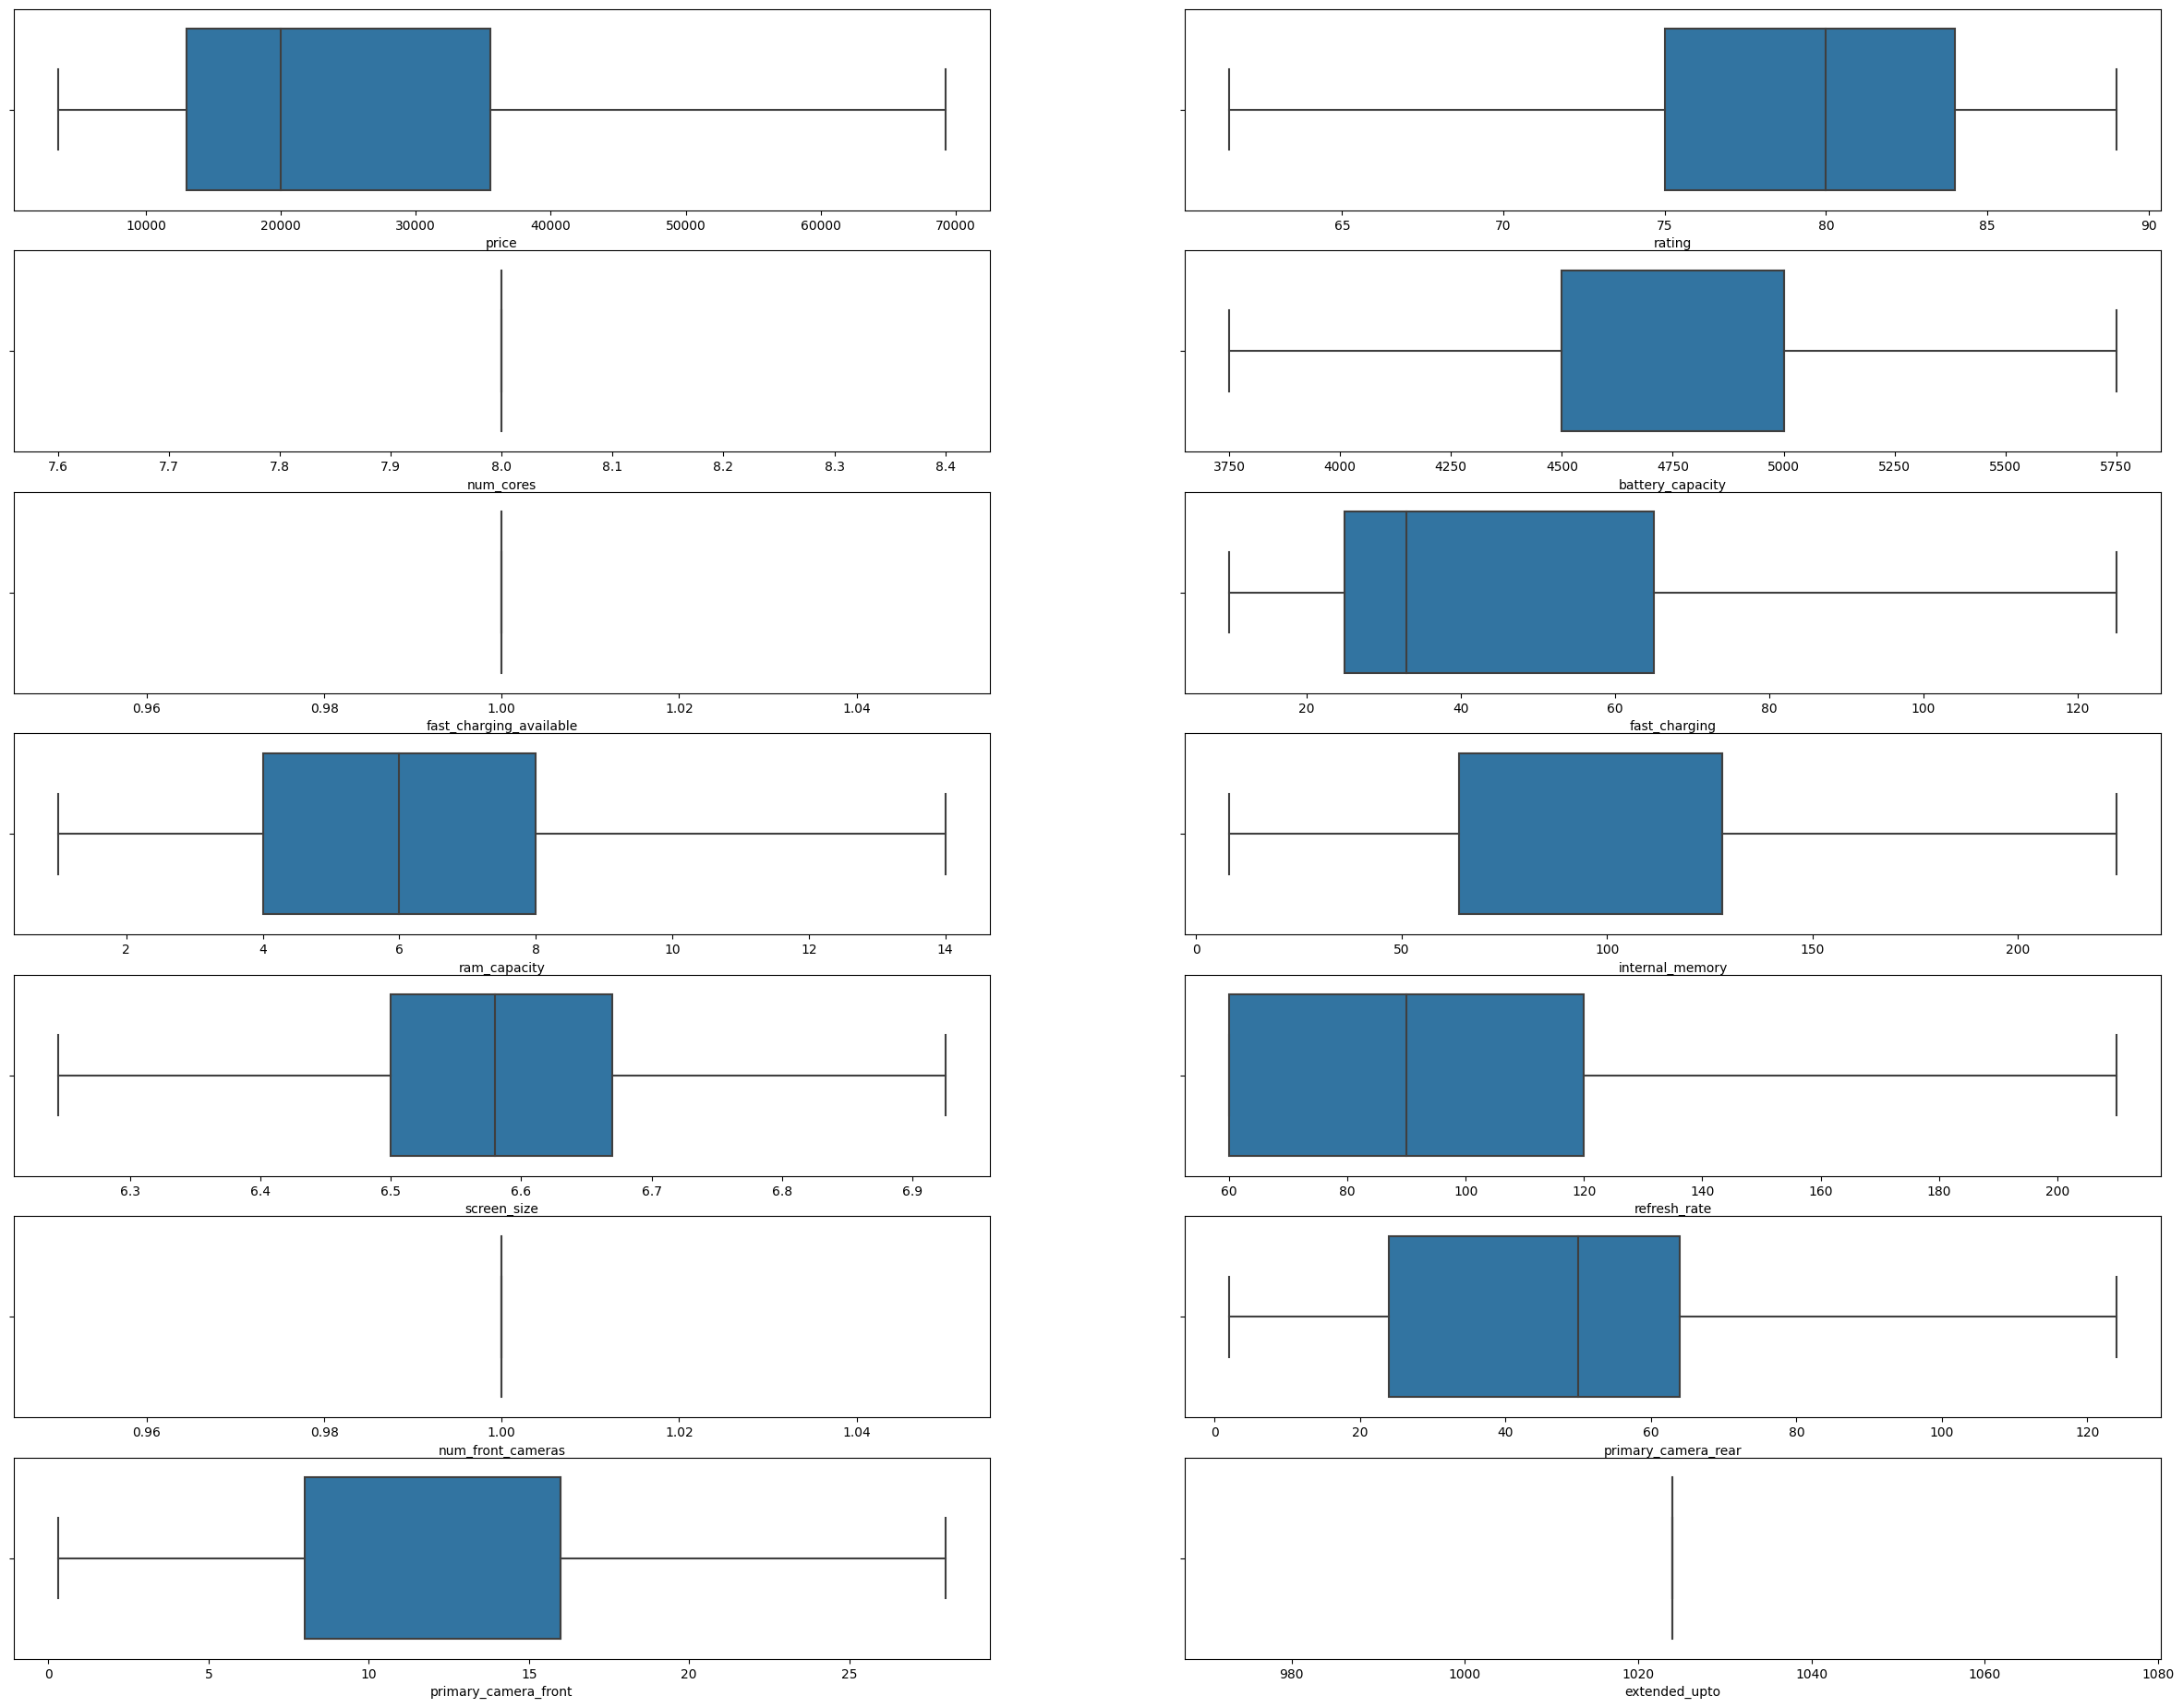

In [51]:
#USING BOXPLOT TO VISUALISE THE OUTLIERS

out_lier = ['price', 'rating', 'num_cores','battery_capacity','fast_charging_available','fast_charging', 'ram_capacity',
            'internal_memory', 'screen_size', 'refresh_rate','num_front_cameras', 'primary_camera_rear', 'primary_camera_front',
            'extended_upto']

plt.figure(figsize=(30,30))
for i , var in enumerate(out_lier):
    plt.subplot(9,2,i+1)
    sns.boxplot(df_cap[var])
    plt.show

THE OUTLIERS ARE HANDLED EFFICIENTLY !!

C:\Users\Ritika Kumari\anaconda3\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


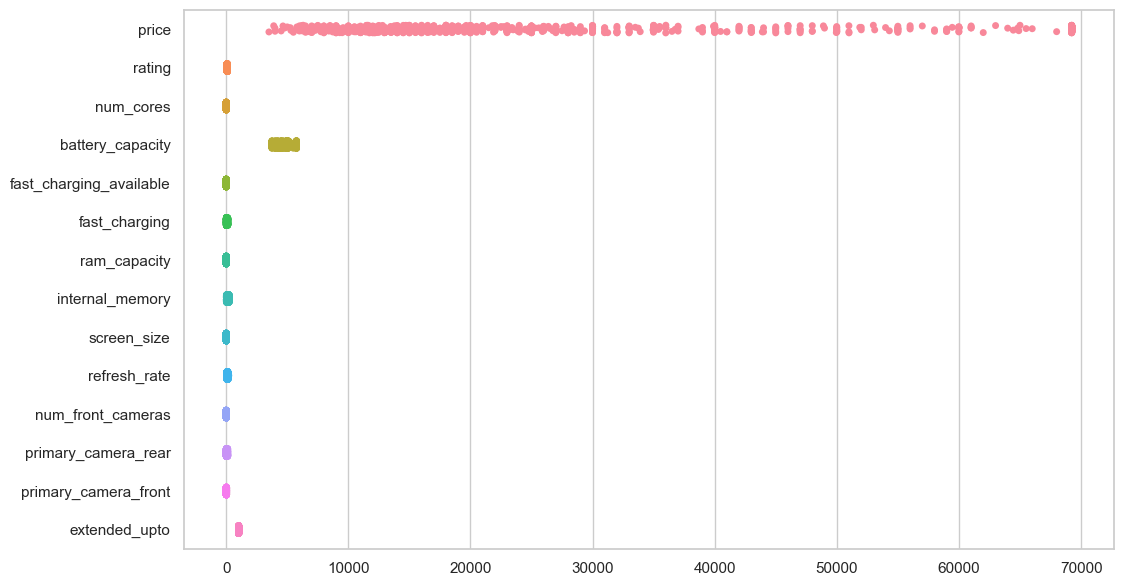

In [52]:
#USING STRIP PLOT TO CHECK HOW OUR OUTLIERS HAVE BEEN HANDLED

out_lier = ['price', 'rating', 'num_cores','battery_capacity','fast_charging_available','fast_charging', 'ram_capacity',
            'internal_memory', 'screen_size', 'refresh_rate','num_front_cameras', 'primary_camera_rear', 'primary_camera_front',
            'extended_upto']


plt.figure(figsize =(12,7))
sns.set(style = 'whitegrid')
sns.stripplot(data = df_cap[['price', 'rating', 'num_cores','battery_capacity','fast_charging_available','fast_charging', 'ram_capacity',
            'internal_memory', 'screen_size', 'refresh_rate','num_front_cameras', 'primary_camera_rear', 'primary_camera_front',
            'extended_upto']] , orient = 'h')
plt.show()

FROM THE ABOVE STRIP PLOT WE CAN SEE ALL THE DATA VALUES OF THE FEATURES FALL WITHIN A RANGE....HENCE WE HAVE HANDLED THE OUTLIERS REALLY WELL.

# LABEL ENCODING(CATEGORICAL --> NUMERICAL)

In [53]:
df_cap.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
0,oneplus,OnePlus 11 5G,3499.0,61.5,True,True,False,snapdragon,8.0,3.2,...,6.245,60.0,1440 x 3216,3.0,1.0,android,2.0,0.3,0.0,1024.0
1,oneplus,OnePlus Nord CE 2 Lite 5G,3890.0,61.5,True,False,False,snapdragon,8.0,2.2,...,6.245,60.0,1080 x 2412,3.0,1.0,android,2.0,2.0,1.0,1024.0
2,samsung,Samsung Galaxy A14 5G,3990.0,61.5,True,False,False,exynos,8.0,2.4,...,6.245,60.0,1080 x 2408,3.0,1.0,android,5.0,2.0,1.0,1024.0
3,motorola,Motorola Moto G62 5G,3999.0,61.5,True,False,False,snapdragon,8.0,2.2,...,6.245,60.0,1080 x 2400,3.0,1.0,android,5.0,2.0,1.0,1024.0
4,realme,Realme 10 Pro Plus,4499.0,61.5,True,False,False,dimensity,8.0,2.6,...,6.245,60.0,1080 x 2412,3.0,1.0,android,5.0,2.0,0.0,1024.0


In [54]:
#DROPPING THE RESOLUTION FEATURE
df = df_cap.drop(columns = "resolution")

#CHECKING THE COLUMNS NAME
df.columns.values

array(['brand_name', 'model', 'price', 'rating', 'has_5g', 'has_nfc',
       'has_ir_blaster', 'processor_brand', 'num_cores',
       'processor_speed', 'battery_capacity', 'fast_charging_available',
       'fast_charging', 'ram_capacity', 'internal_memory', 'screen_size',
       'refresh_rate', 'num_rear_cameras', 'num_front_cameras', 'os',
       'primary_camera_rear', 'primary_camera_front',
       'extended_memory_available', 'extended_upto'], dtype=object)

In [55]:
#LISTING OUT THE CATEGORICAL FEATURES


cat_var = df.select_dtypes(include=['O']).keys()
cat_var

Index(['brand_name', 'model', 'processor_brand', 'os'], dtype='object')

In [56]:
df[cat_var].head()

,brand_name,model,processor_brand,os
0,oneplus,OnePlus 11 5G,snapdragon,android
1,oneplus,OnePlus Nord CE 2 Lite 5G,snapdragon,android
2,samsung,Samsung Galaxy A14 5G,exynos,android
3,motorola,Motorola Moto G62 5G,snapdragon,android
4,realme,Realme 10 Pro Plus,dimensity,android


# PERFORMING ORDINAL ENCODING ON THE "OS" FEATURE

In [57]:
#CHECKING THE COUNT OF LABELS IN THE 'furnishingstatus' FEATURE

df['os'].value_counts()

android    923
ios         46
other       11
Name: os, dtype: int64

In [58]:
#CREATING DICTIONARY TO LABEL ALL THE CLASSEs
order_label ={"android" : 1 , "ios" : 2 , "other" : 3 }

#APPLYING ORDER ENCODING
df['os_ord_enc'] = df['os'].map(order_label)

In [59]:
#DROPPING THE CATEGORICAL FEATURE

df = df.drop(columns = ['os'])

In [60]:
#DISPLAYING ALL COLUMNS AND ROWS


pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [61]:
#CHECKING THE HEAD VALUES OF THE DATAFRAME

df.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,os_ord_enc
0,oneplus,OnePlus 11 5G,3499.0,61.5,True,True,False,snapdragon,8.0,3.2,3750.0,1.0,10.0,1.0,8.0,6.245,60.0,3.0,1.0,2.0,0.3,0.0,1024.0,1
1,oneplus,OnePlus Nord CE 2 Lite 5G,3890.0,61.5,True,False,False,snapdragon,8.0,2.2,3750.0,1.0,10.0,1.0,16.0,6.245,60.0,3.0,1.0,2.0,2.0,1.0,1024.0,1
2,samsung,Samsung Galaxy A14 5G,3990.0,61.5,True,False,False,exynos,8.0,2.4,3750.0,1.0,10.0,1.0,16.0,6.245,60.0,3.0,1.0,5.0,2.0,1.0,1024.0,1
3,motorola,Motorola Moto G62 5G,3999.0,61.5,True,False,False,snapdragon,8.0,2.2,3750.0,1.0,10.0,1.0,16.0,6.245,60.0,3.0,1.0,5.0,2.0,1.0,1024.0,1
4,realme,Realme 10 Pro Plus,4499.0,61.5,True,False,False,dimensity,8.0,2.6,3750.0,1.0,10.0,1.0,16.0,6.245,60.0,3.0,1.0,5.0,2.0,0.0,1024.0,1


"OS" HAS BEEN ORDINALLY ENCODED

In [62]:
#CHECKING THE COUNT OF LABELS IN THE 'model' FEATURE

df['model'].unique()

array(['OnePlus 11 5G', 'OnePlus Nord CE 2 Lite 5G',
       'Samsung Galaxy A14 5G', 'Motorola Moto G62 5G',
       'Realme 10 Pro Plus', 'Samsung Galaxy F23 5G (6GB RAM + 128GB)',
       'Apple iPhone 14', 'Xiaomi Redmi Note 12 Pro Plus',
       'Nothing Phone 1', 'OnePlus Nord 2T 5G', 'Realme 10 Pro',
       'Oppo A78', 'Xiaomi Redmi Note 12 Pro 5G',
       'Vivo T1 5G (6GB RAM + 128GB)', 'Samsung Galaxy S23 Ultra 5G',
       'Apple iPhone 13', 'Vivo Y16', 'OPPO Reno 9 Pro Plus',
       'OnePlus 10R 5G', 'Vivo Y22', 'OnePlus 11R', 'Vivo V25 Pro 5G',
       'Poco X4 Pro 5G', 'Xiaomi Redmi Note 12', 'Vivo V26 Pro',
       'Samsung Galaxy S20 FE 5G',
       'OnePlus Nord CE 2 Lite 5G (8GB RAM + 128GB)',
       'Apple iPhone 14 Pro Max', 'Vivo V25 5G', 'OnePlus 11 Pro',
       'Realme 10 Pro (8GB RAM + 128GB)', 'Poco X5 Pro', 'Vivo V27',
       'Apple iPhone 11', 'Samsung Galaxy M53 5G',
       'Samsung Galaxy S21 FE 5G', 'Oppo Reno 8T',
       'Samsung Galaxy S22 Ultra 5G', 'Xiaomi Redm

In [63]:
#CHECKING THE COUNT OF LABELS IN THE 'processor_brand' FEATURE

df['processor_brand'].value_counts()

snapdragon    433
helio         201
dimensity     177
exynos         50
bionic         45
unisoc         26
tiger          24
google          9
kirin           7
spreadtrum      4
sc9863a         2
fusion          1
mediatek        1
Name: processor_brand, dtype: int64

In [64]:
#CHECKING THE COUNT OF LABELS IN THE 'brand_name' FEATURE

df['brand_name'].value_counts()

xiaomi       134
samsung      132
vivo         111
realme        97
oppo          88
motorola      52
apple         46
oneplus       42
poco          41
tecno         33
iqoo          32
infinix       29
huawei        16
google        14
nokia         13
honor         13
itel          10
sony           9
asus           7
nubia          6
nothing        5
lava           4
jio            4
gionee         3
micromax       3
oukitel        3
lg             3
redmi          3
letv           3
ikall          3
royole         2
doogee         2
zte            2
lenovo         2
lyf            2
sharp          1
tcl            1
cat            1
leitz          1
duoqin         1
leeco          1
blu            1
vertu          1
tesla          1
cola           1
blackview      1
Name: brand_name, dtype: int64

# PERFORMING LABEL ENCODING ON THE FOLLOWING FEATURES : 
    1. model
    2. processor_brand
    3. brand_name

In [65]:
#PICKING OUT THE VARIABLE ON WHICH LABEL ENCODING HAS TO BE PERFORMED

df2 = df[['model' , 'processor_brand' , 'brand_name']]

In [66]:
#MAKING CLAS
le = LabelEncoder()

#MAKING OBJECT OF THE CLASS
le.fit_transform(df2["model"])

#ARRAY TO DATAFRAME CONVERSION
df2['model_l_enc'] = le.fit_transform(df2["model"])

C:\Users\Ritika Kumari\AppData\Local\Temp\ipykernel_13664\3155927985.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['model_l_enc'] = le.fit_transform(df2["model"])


In [67]:
#MAKING OBJECT OF THE CLASS
le.fit_transform(df2["processor_brand"])

#ARRAY TO DATAFRAME CONVERSION
df2['processor_brand_l_enc'] = le.fit_transform(df2["processor_brand"])

C:\Users\Ritika Kumari\AppData\Local\Temp\ipykernel_13664\392765826.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['processor_brand_l_enc'] = le.fit_transform(df2["processor_brand"])


In [68]:
#MAKING OBJECT OF THE CLASS
le.fit_transform(df2["brand_name"])

#ARRAY TO DATAFRAME CONVERSION
df2['brand_name_l_enc'] = le.fit_transform(df2["brand_name"])

C:\Users\Ritika Kumari\AppData\Local\Temp\ipykernel_13664\3409988346.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['brand_name_l_enc'] = le.fit_transform(df2["brand_name"])


In [69]:
df2.head()

,model,processor_brand,brand_name,model_l_enc,processor_brand_l_enc,brand_name_l_enc
0,OnePlus 11 5G,snapdragon,oneplus,307,9,29
1,OnePlus Nord CE 2 Lite 5G,snapdragon,oneplus,327,9,29
2,Samsung Galaxy A14 5G,exynos,samsung,532,2,36
3,Motorola Moto G62 5G,snapdragon,motorola,198,9,25
4,Realme 10 Pro Plus,dimensity,realme,415,1,33


In [70]:
#DROPPING THE COLUMNS

df1 = df2.drop(columns = ['model' , 'processor_brand' , 'brand_name'])
df1.head()

,model_l_enc,processor_brand_l_enc,brand_name_l_enc
0,307,9,29
1,327,9,29
2,532,2,36
3,198,9,25
4,415,1,33


In [71]:
df.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,os_ord_enc
0,oneplus,OnePlus 11 5G,3499.0,61.5,True,True,False,snapdragon,8.0,3.2,3750.0,1.0,10.0,1.0,8.0,6.245,60.0,3.0,1.0,2.0,0.3,0.0,1024.0,1
1,oneplus,OnePlus Nord CE 2 Lite 5G,3890.0,61.5,True,False,False,snapdragon,8.0,2.2,3750.0,1.0,10.0,1.0,16.0,6.245,60.0,3.0,1.0,2.0,2.0,1.0,1024.0,1
2,samsung,Samsung Galaxy A14 5G,3990.0,61.5,True,False,False,exynos,8.0,2.4,3750.0,1.0,10.0,1.0,16.0,6.245,60.0,3.0,1.0,5.0,2.0,1.0,1024.0,1
3,motorola,Motorola Moto G62 5G,3999.0,61.5,True,False,False,snapdragon,8.0,2.2,3750.0,1.0,10.0,1.0,16.0,6.245,60.0,3.0,1.0,5.0,2.0,1.0,1024.0,1
4,realme,Realme 10 Pro Plus,4499.0,61.5,True,False,False,dimensity,8.0,2.6,3750.0,1.0,10.0,1.0,16.0,6.245,60.0,3.0,1.0,5.0,2.0,0.0,1024.0,1


In [72]:
#DROPPING THE COLUMNS
df2 = df.drop(columns = ['model' , 'processor_brand' , 'brand_name'])

In [73]:
df1.head()

,model_l_enc,processor_brand_l_enc,brand_name_l_enc
0,307,9,29
1,327,9,29
2,532,2,36
3,198,9,25
4,415,1,33


In [74]:
df2.head()

,price,rating,has_5g,has_nfc,has_ir_blaster,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,os_ord_enc
0,3499.0,61.5,True,True,False,8.0,3.2,3750.0,1.0,10.0,1.0,8.0,6.245,60.0,3.0,1.0,2.0,0.3,0.0,1024.0,1
1,3890.0,61.5,True,False,False,8.0,2.2,3750.0,1.0,10.0,1.0,16.0,6.245,60.0,3.0,1.0,2.0,2.0,1.0,1024.0,1
2,3990.0,61.5,True,False,False,8.0,2.4,3750.0,1.0,10.0,1.0,16.0,6.245,60.0,3.0,1.0,5.0,2.0,1.0,1024.0,1
3,3999.0,61.5,True,False,False,8.0,2.2,3750.0,1.0,10.0,1.0,16.0,6.245,60.0,3.0,1.0,5.0,2.0,1.0,1024.0,1
4,4499.0,61.5,True,False,False,8.0,2.6,3750.0,1.0,10.0,1.0,16.0,6.245,60.0,3.0,1.0,5.0,2.0,0.0,1024.0,1


In [75]:
#CONCATING BOTH THE DATAFRAMES

df3 = pd.concat([df2 , df1] , axis=1)
df3.head()

,price,rating,has_5g,has_nfc,has_ir_blaster,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,os_ord_enc,model_l_enc,processor_brand_l_enc,brand_name_l_enc
0,3499.0,61.5,True,True,False,8.0,3.2,3750.0,1.0,10.0,1.0,8.0,6.245,60.0,3.0,1.0,2.0,0.3,0.0,1024.0,1,307,9,29
1,3890.0,61.5,True,False,False,8.0,2.2,3750.0,1.0,10.0,1.0,16.0,6.245,60.0,3.0,1.0,2.0,2.0,1.0,1024.0,1,327,9,29
2,3990.0,61.5,True,False,False,8.0,2.4,3750.0,1.0,10.0,1.0,16.0,6.245,60.0,3.0,1.0,5.0,2.0,1.0,1024.0,1,532,2,36
3,3999.0,61.5,True,False,False,8.0,2.2,3750.0,1.0,10.0,1.0,16.0,6.245,60.0,3.0,1.0,5.0,2.0,1.0,1024.0,1,198,9,25
4,4499.0,61.5,True,False,False,8.0,2.6,3750.0,1.0,10.0,1.0,16.0,6.245,60.0,3.0,1.0,5.0,2.0,0.0,1024.0,1,415,1,33


In [76]:
#GETTING INFORMATION ABOUT THE DATAFRAME

df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   price                      980 non-null    float64
 1   rating                     980 non-null    float64
 2   has_5g                     980 non-null    bool   
 3   has_nfc                    980 non-null    bool   
 4   has_ir_blaster             980 non-null    bool   
 5   num_cores                  980 non-null    float64
 6   processor_speed            980 non-null    float64
 7   battery_capacity           980 non-null    float64
 8   fast_charging_available    980 non-null    float64
 9   fast_charging              980 non-null    float64
 10  ram_capacity               980 non-null    float64
 11  internal_memory            980 non-null    float64
 12  screen_size                980 non-null    float64
 13  refresh_rate               980 non-null    float64

In [77]:
#CONVERTING THE BOOLEAN FEATURES INTO NUMERICAL

df3['has_5g'] = df3['has_5g'].astype(int)
df3['has_nfc'] = df3['has_nfc'].astype(int)
df3['has_ir_blaster'] = df3['has_ir_blaster'].astype(int)

In [78]:
#FINALLY , CHECKING THE DATATYPES
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   price                      980 non-null    float64
 1   rating                     980 non-null    float64
 2   has_5g                     980 non-null    int32  
 3   has_nfc                    980 non-null    int32  
 4   has_ir_blaster             980 non-null    int32  
 5   num_cores                  980 non-null    float64
 6   processor_speed            980 non-null    float64
 7   battery_capacity           980 non-null    float64
 8   fast_charging_available    980 non-null    float64
 9   fast_charging              980 non-null    float64
 10  ram_capacity               980 non-null    float64
 11  internal_memory            980 non-null    float64
 12  screen_size                980 non-null    float64
 13  refresh_rate               980 non-null    float64

AS WE CAN SEE THAT ALL THE FEATURES ARE OF NUMERICAL TYPE....WE HAVE SUCCESSFULLY PERFORMED ENCODING.

# SPLITTING

In [79]:
#SPLITTING INTO X MATRIX AND y VECTOR

X = df3.drop(columns=['price'],axis=1)
y = df[['price']]

In [80]:
#PRINTING THE SHAPE OF X-MATRIX AND y-VECTOR

print("shape of X :",X.shape )
print("shape of y :",y.shape )

shape of X : (980, 23)
shape of y : (980, 1)


In [81]:
#SPLITTING  THE DATA IN TRAIN AND TEST

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=2)

print('shape of X_train : ', X_train.shape)
print('shape of X_test : ', X_test.shape)
print('shape of y_train : ', y_train.shape)
print('shape of y_test : ', y_test.shape)

shape of X_train :  (784, 23)
shape of X_test :  (196, 23)
shape of y_train :  (784, 1)
shape of y_test :  (196, 1)


# FEATURE SELECTION
Feature Selection is the method of reducing the input variable to your model by using only relevant data and getting rid of noise in data. 

 It is the process of automatically choosing relevant features for your machine learning model based on the type of problem you are trying to solve.

GETTING THE UNIQUE VALUES IN THE FOLLOWING FEATURE

In [82]:
df3['num_cores'].unique() 

array([8.])

In [83]:
df3['fast_charging_available'].unique() 

array([1.])

In [84]:
df3['num_front_cameras'].unique() 

array([1.])

In [85]:
df3['extended_upto'].unique() 

array([1024.])

WE CAN SEE THAT THE ABOVE FEATURES ARE HAVING CONSTANT VALUES AND HENCE THEY ARE NOT IMPORTANT FOR SOLVING THE PROBLEM STATEMENT.
THEREFORE WE WILL DROP THOSE FEATURES.

In [86]:
#DROPPING COLUMNS 
X_train = X_train.drop(columns=['num_cores' , 'fast_charging_available' , 'num_front_cameras' , 'extended_upto'])
X_test = X_test.drop(columns=['num_cores' , 'fast_charging_available' , 'num_front_cameras' , 'extended_upto'])

In [87]:
X_test.columns.values

array(['rating', 'has_5g', 'has_nfc', 'has_ir_blaster', 'processor_speed',
       'battery_capacity', 'fast_charging', 'ram_capacity',
       'internal_memory', 'screen_size', 'refresh_rate',
       'num_rear_cameras', 'primary_camera_rear', 'primary_camera_front',
       'extended_memory_available', 'os_ord_enc', 'model_l_enc',
       'processor_brand_l_enc', 'brand_name_l_enc'], dtype=object)

In [88]:
#GETTING THE CORRELATION MATRIX

cor = X_train.corr()
cor

,rating,has_5g,has_nfc,has_ir_blaster,processor_speed,battery_capacity,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,os_ord_enc,model_l_enc,processor_brand_l_enc,brand_name_l_enc
rating,1.000000,-0.240331,-0.076116,-0.011361,-0.116143,0.953084,0.797742,0.903871,0.895687,0.975586,0.856063,0.005659,0.887474,0.899977,0.035018,-0.016884,-0.005117,0.086751,-0.038986
has_5g,-0.240331,1.000000,0.494907,0.125834,0.597053,-0.219866,-0.164386,-0.208162,-0.210230,-0.218589,-0.211011,0.195970,-0.186333,-0.223477,-0.518019,0.019661,-0.041224,-0.204746,-0.088894
has_nfc,-0.076116,0.494907,1.000000,-0.002681,0.606997,-0.059646,-0.064443,-0.059069,-0.072897,-0.070404,-0.077730,0.168713,-0.033844,-0.092392,-0.564315,0.229873,-0.256720,-0.044651,-0.264377
has_ir_blaster,-0.011361,0.125834,-0.002681,1.000000,0.117320,-0.014227,-0.043279,-0.021553,-0.026447,-0.018713,-0.015180,0.180236,-0.020871,-0.022241,-0.049164,-0.057232,0.394005,-0.042802,0.318463
processor_speed,-0.116143,0.597053,0.606997,0.117320,1.000000,-0.104669,-0.098756,-0.106763,-0.106435,-0.114402,-0.113125,0.240630,-0.095683,-0.121062,-0.657001,0.198566,-0.093786,-0.138905,-0.118674
battery_capacity,0.953084,-0.219866,-0.059646,-0.014227,-0.104669,1.000000,0.799903,0.909365,0.853562,0.932250,0.815340,0.003683,0.902221,0.836156,0.029789,-0.046328,-0.002432,0.100798,-0.038142
fast_charging,0.797742,-0.164386,-0.064443,-0.043279,-0.098756,0.799903,1.000000,0.886769,0.855174,0.863727,0.810993,0.005464,0.912370,0.882676,0.029725,-0.020442,-0.010076,0.090547,-0.043467
ram_capacity,0.903871,-0.208162,-0.059069,-0.021553,-0.106763,0.909365,0.886769,1.000000,0.867544,0.934426,0.893633,0.008673,0.933713,0.889432,0.020803,-0.026120,-0.000641,0.096932,-0.040065
internal_memory,0.895687,-0.210230,-0.072897,-0.026447,-0.106435,0.853562,0.855174,0.867544,1.000000,0.893296,0.786602,0.015262,0.890394,0.937276,0.021246,-0.010561,-0.003559,0.088008,-0.036672
screen_size,0.975586,-0.218589,-0.070404,-0.018713,-0.114402,0.932250,0.863727,0.934426,0.893296,1.000000,0.888105,0.003657,0.914420,0.916160,0.033026,-0.021543,-0.015844,0.081682,-0.050146


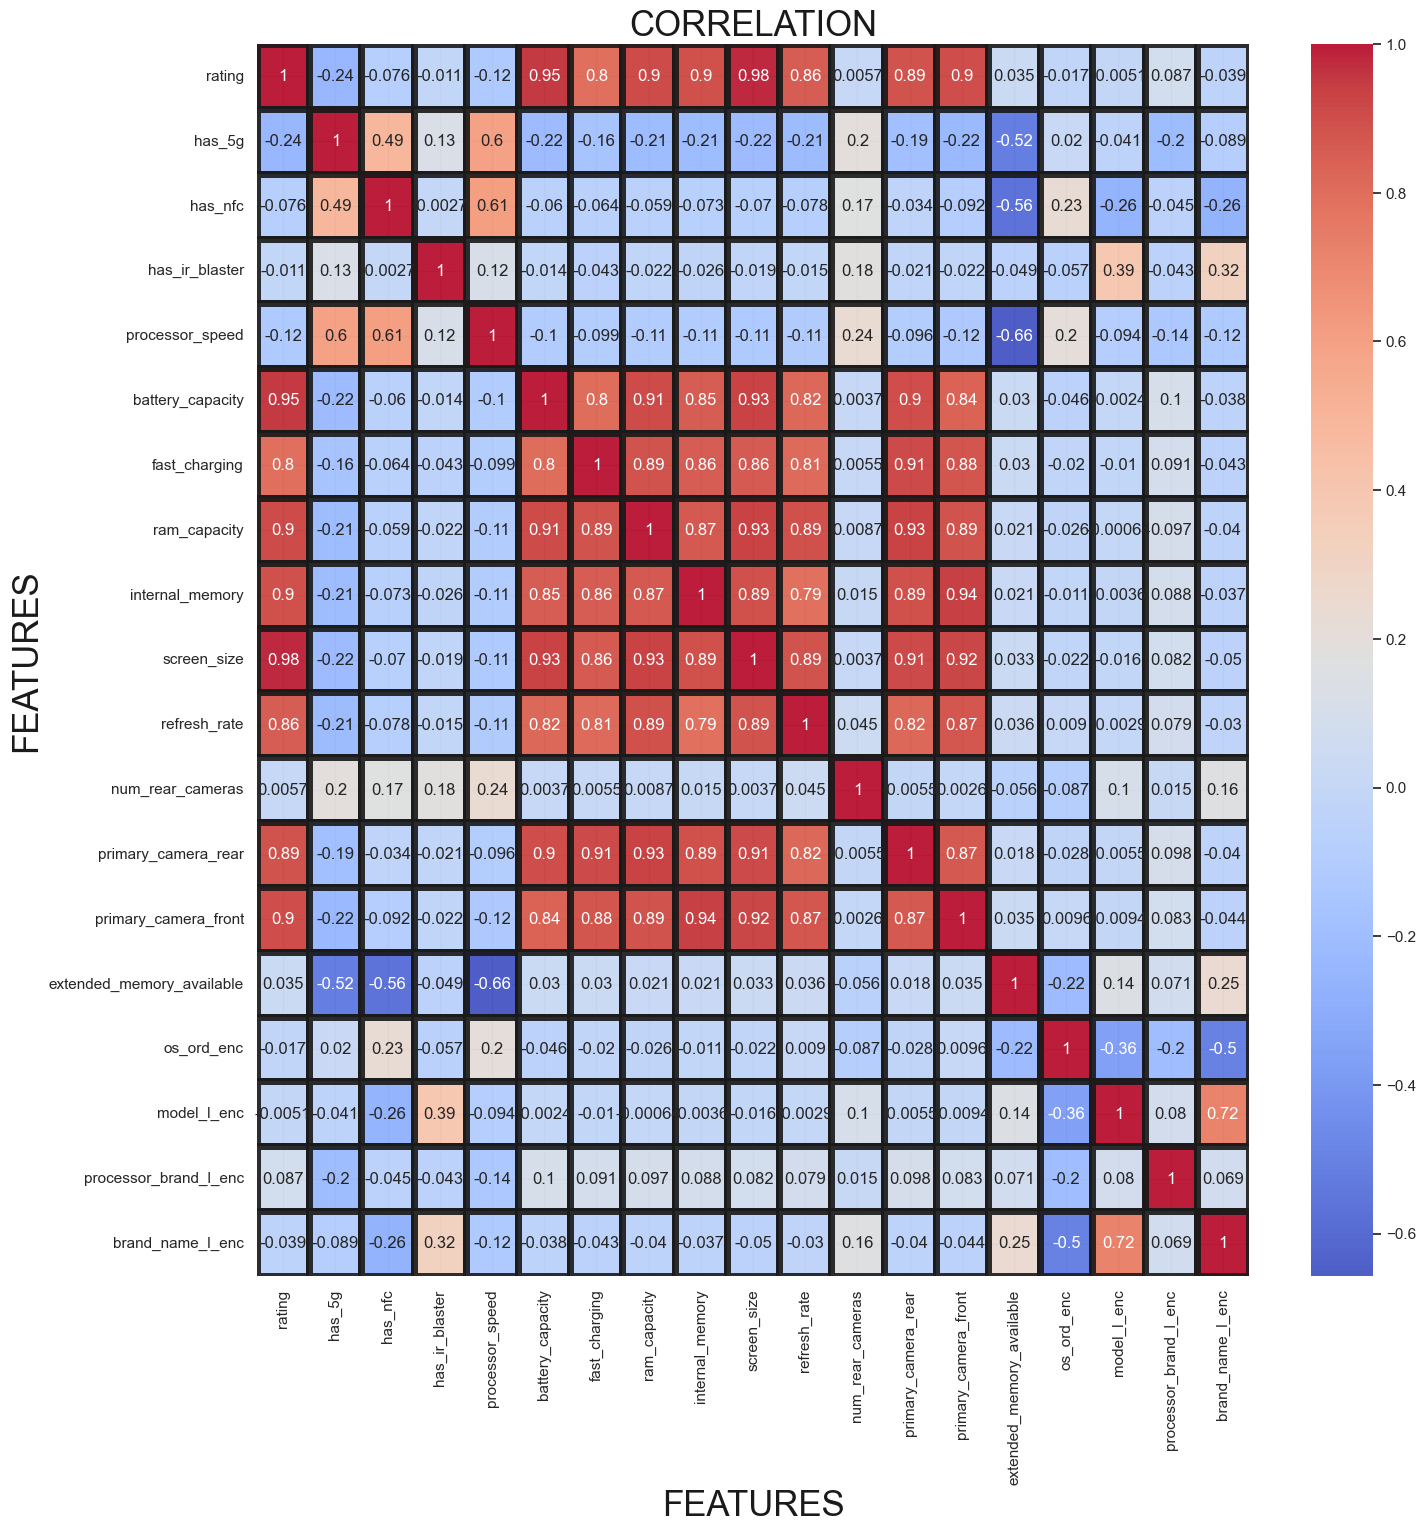

In [89]:
#GETTING THE CORRELATION OF ALL THE FEATURES EXCEPT THE TARGET FEATURE

plt.figure(figsize=(16,16))
sns.heatmap(cor,annot = True,linewidth = 5,linecolor='k',alpha=0.9,cbar_kws={"shrink":1},cmap='coolwarm')
plt.title("CORRELATION",fontsize = 25,color='k')
plt.xlabel("FEATURES",fontsize = 25,color = 'k')
plt.ylabel("FEATURES",fontsize = 25,color = 'k')
plt.show()

In [90]:
#with the following function we can select highly correlated features
# it will remove the first feature that is correlated with any other feature


def correlation(dataset , threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
    return col_corr



drop_feature = correlation(X_train , 0.8)
drop_feature

{'battery_capacity',
 'internal_memory',
 'primary_camera_front',
 'primary_camera_rear',
 'ram_capacity',
 'refresh_rate',
 'screen_size'}

In [91]:
#DROPPING COLUMNS 
X_train = X_train.drop(columns=['battery_capacity',
 'internal_memory',
 'primary_camera_front',
 'primary_camera_rear',
 'ram_capacity',
 'refresh_rate',
 'screen_size'])
X_test = X_test.drop(columns=['battery_capacity',
 'internal_memory',
 'primary_camera_front',
 'primary_camera_rear',
 'ram_capacity',
 'refresh_rate',
 'screen_size'])

In [92]:
#CHECKING THE SHAPES 

print("shape of X_train :",X_train.shape )
print("shape of X_test :",X_test.shape )

shape of X_train : (784, 12)
shape of X_test : (196, 12)


In [93]:
# determine the mutual information

mutual_info = mutual_info_regression(X_train, y_train)
mutual_info

C:\Users\Ritika Kumari\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([2.87643402, 0.05067621, 0.        , 0.01011108, 0.0280046 ,
       2.03184489, 0.02880778, 0.02804906, 0.        , 0.03712882,
       0.01308318, 0.00745948])

In [94]:
#GETTING THE MUTUAL INFORMATION
#IN DESCENDING ORDER


mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

rating                       2.876434
fast_charging                2.031845
has_5g                       0.050676
model_l_enc                  0.037129
num_rear_cameras             0.028808
extended_memory_available    0.028049
processor_speed              0.028005
processor_brand_l_enc        0.013083
has_ir_blaster               0.010111
brand_name_l_enc             0.007459
has_nfc                      0.000000
os_ord_enc                   0.000000
dtype: float64

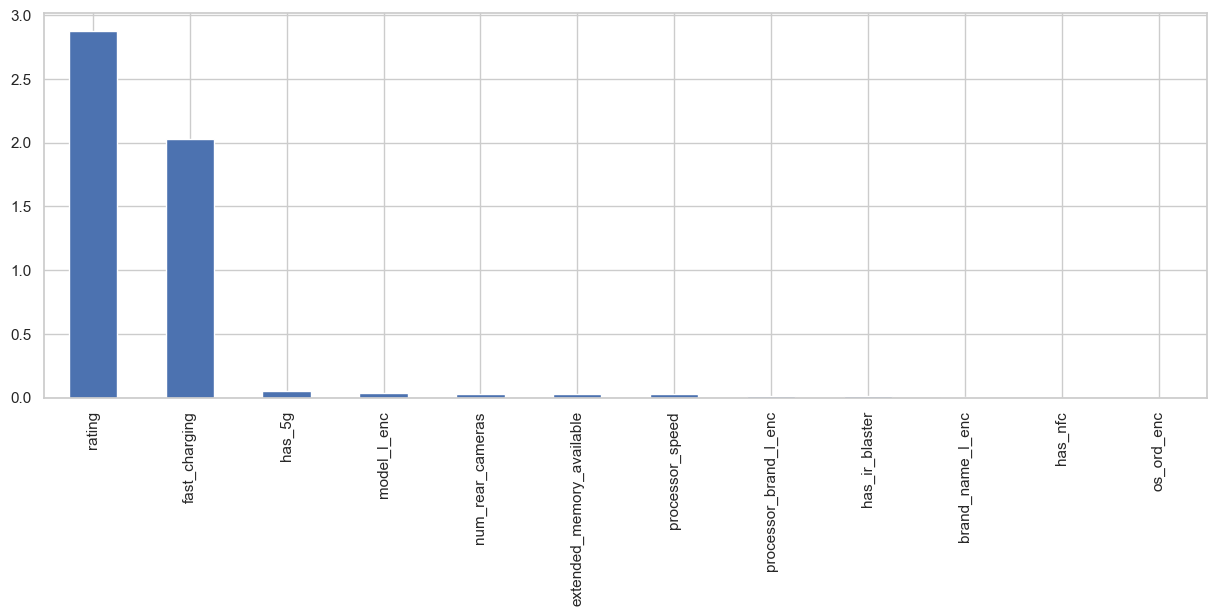

In [95]:
##VISUALISAION WITH THE HELP OF PLOT

mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))
plt.show()

In [96]:
## Selecting the top 20 percentile

selected_top_columns = SelectPercentile(mutual_info_regression, percentile=20)
selected_top_columns.fit(X_train, y_train)

C:\Users\Ritika Kumari\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SelectPercentile(percentile=20,
                 score_func=<function mutual_info_regression at 0x0000026CAE0D58B0>)

In [97]:
#DISPLAYING WHETHER THE FEATURE IS SELECTED OR NOT IN THE FORM OF TRUE OR FALSE

selected_top_columns.get_support()

array([ True, False, False, False, False,  True,  True, False, False,
       False, False, False])

In [98]:
#DISPLAYING THE NAME OF THE SELECTED FEATURE

X_train.columns[selected_top_columns.get_support()]

Index(['rating', 'fast_charging', 'num_rear_cameras'], dtype='object')

In [99]:
#HAVING ONLY THE SELECTED FEATURES IN THE DATASETS

X_train = X_train[['rating', 'fast_charging', 'num_rear_cameras']]
X_test = X_test[['rating', 'fast_charging', 'num_rear_cameras']]

In [100]:
#CHECKING THE HEAD VALUE
X_train.head()

,rating,fast_charging,num_rear_cameras
878,86.0,80.0,4.0
663,82.0,33.0,3.0
344,77.0,33.0,2.0
777,84.0,66.0,3.0
152,71.0,18.0,3.0


In [101]:
#CHECKING THE HEAD VALUE
X_test.head()

,rating,fast_charging,num_rear_cameras
934,88.0,120.0,1.0
258,75.0,25.0,3.0
318,77.0,33.0,3.0
462,80.0,33.0,2.0
637,82.0,33.0,2.0


In [102]:
#CREATING OBJECT

sc = StandardScaler()
sc.fit(X_train)

StandardScaler()

In [103]:
#TRANSFORMING THE DATASETS

X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

In [104]:
#CONVERTING THE ARRAY INTO DATAFRAME

X_train_sc = pd.DataFrame(X_train_sc,columns = ['rating', 'fast_charging', 'num_rear_cameras'])
X_test_sc = pd.DataFrame(X_test_sc,columns = ['rating', 'fast_charging', 'num_rear_cameras'])

In [105]:
#CHECKING THE DESCRIPTION OF THE DATAFRAME

X_train_sc.describe().round(2)

,rating,fast_charging,num_rear_cameras
count,784.00,784.00,784.00
mean,0.00,0.00,-0.00
std,1.00,1.00,1.00
min,-2.37,-1.15,-2.39
25%,-0.47,-0.62,-1.08
50%,0.23,-0.34,0.22
75%,0.80,0.78,0.22
max,1.50,2.89,1.53


WE HAVE SUCCESSFULLY PERFORMED FEATURE SCALING

In [106]:
X_train_sc.head()

,rating,fast_charging,num_rear_cameras
0,1.077568,1.310731,1.530717
1,0.513936,-0.340815,0.224860
2,-0.190603,-0.340815,-1.080996
3,0.795752,0.818781,0.224860
4,-1.036050,-0.867904,0.224860


C:\Users\Ritika Kumari\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


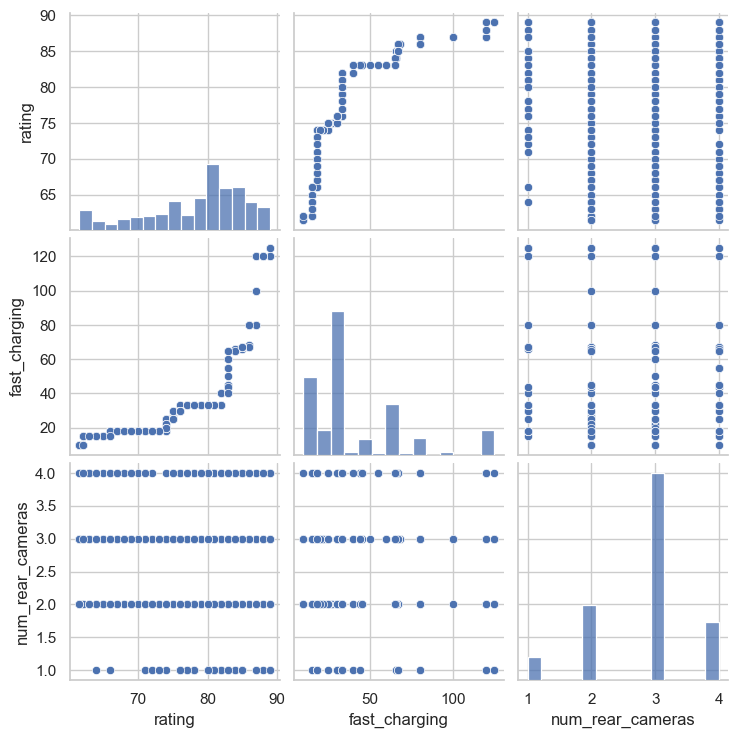

In [107]:
#VISUALISING THE DISTRIBUTION OF THE ACTUAL DATASTET

sns.pairplot(X_train)
plt.show()

C:\Users\Ritika Kumari\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


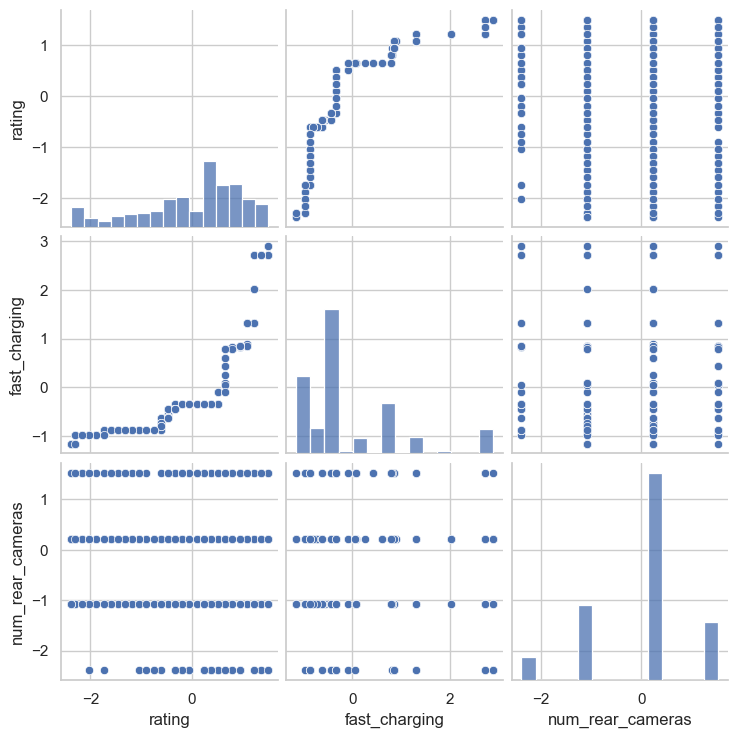

In [108]:
#VISUALISING THE DISTRIBUTION OF THE TRAINED DATASTET
sns.pairplot(X_train_sc)
plt.show()

WE CAN SEE THAT THE DISTRIBUTION OF THE DATASET HAS NOT CHANGED AFTER SCALING.

# MODEL TRAINING

MODEL TRAINING IS THE PHASE IN THE DATA SCIENCE DEVELOPMENT LIFECYCLE WHERE PRACTITIONERS TRY TO FIT THE BEST COMBINATION OF WEIGHTS AND BIAS TO A MACHINE LEARNING ALGORITHM TO MINIMISE A LOSS FUNCTION OVER THE PREDICTION RANGE.

# DECISION TREE REGRESSOR

In [109]:

dtr = DecisionTreeRegressor()

# HYPERTUNING USING GRIDSEARCHCV

In [110]:
#SELECTTING PARAMETERS FOR GRID SEARCH
params ={
    'max_depth':[2,4,6,8],
    'min_samples_split':[2,4,6,8],
    'min_samples_leaf': [1,2,3,4],
    'max_features':['auto' , 'sqrt' , 'log2'],
    'random_state':[0,42]

}
#GRID SEARCH OBJECT
grid = GridSearchCV(dtr , param_grid=params ,cv=5,verbose = 1,n_jobs=-1)

#FITTING THE GRID SEARCH
grid.fit(X_train , y_train)

#PRINTING BEST PARAMETERS
print(grid.best_params_)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits
{'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 4, 'random_state': 42}


In [111]:
#DECISION TREE REGRESSOR WITH BEST PARAMETERS

dtr = DecisionTreeRegressor(max_depth=8, max_features= 'auto', min_samples_leaf= 1, min_samples_split= 4, random_state= 42)

In [112]:
#FITTING THE MODEL

dtr.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=8, max_features='auto', min_samples_split=4,
                      random_state=42)

In [113]:
#TRAINING SCORE

dtr.score(X_train , y_train)

0.9962696768128886

In [114]:
#PREDICTING THE TEST SET
y_pred=dtr.predict(X_test)

# MODEL EVALUATION

In [115]:
from sklearn.metrics import r2_score , mean_squared_error,mean_absolute_error
print("r2_score : " , r2_score(y_test,y_pred))
print("mse : " , mean_squared_error(y_test,y_pred))
print("mean absolute error:" , mean_absolute_error(y_test,y_pred))
print("rmse : " , np.sqrt(mean_squared_error(y_test,y_pred)))

r2_score :  0.9947323604707943
mse :  1939432.9752687654
mean absolute error: 842.0328909348159
rmse :  1392.6352628268342


# CONCLUSION:
    THE AIM OF THIS PROJECT WAS TO PREDICT THE PRICE OF MOBILE PHONE BY ANALYSING FEATURES SUCH AS BRAND NAME,PROCESSOR NAME ETC.
    
    THE DECISION TREE REGRESSOR MODEL WAS USED TO PREDICT THE PHONE PRICE.THE MODAL WAS ABLE TO PREDICT THE PHONE PRICE WITH 99.47 ACCURACY.                                                                                                                                              